# Flights Datasets Exploration
## by Raied Aljolayfi

## Preliminary Wrangling

> These datasets reports ﬂights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
> I will start with **2008** dataset which has **7,009,728** records

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the 2008 filghts dataset into a pandas dataframe

#df_1987 = pd.read_csv('1987.csv')
#df_2007 = pd.read_csv('2007.csv')
df_2008 = pd.read_csv('2008.csv')

In [3]:
# load in the carriers dataset into a pandas dataframe

carrier = pd.read_csv('carriers.csv')

In [4]:
# load in the Airports dataset into a pandas dataframe

airport = pd.read_csv('Airports.csv')

In [5]:
# high-level overview of data shape and composition for df_2008
print(df_2008.shape)
print(df_2008.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [6]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
# descriptive statistics for float variables

df_2008.describe(include = float)

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.873482e+06,6.858079e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,6.858079e+06,6.872670e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.333830e+03,1.481258e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,6.860852e+00,1.645305e+01,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.780689e+02,5.052251e+02,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,4.933649e+00,1.133280e+01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,1.107000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.512000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.909000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.400000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
# high-level overview of data shape and composition for carrier
print(carrier.shape)
print(carrier.dtypes)

(1491, 2)
Code           object
Description    object
dtype: object


In [9]:
carrier.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
# Show all carrier name
for x in range(carrier.shape[0]):
    print(x,' ', carrier.Description[x])

0   Titan Airways
1   Tradewind Aviation
2   Comlux Aviation, AG
3   Master Top Linhas Aereas Ltd.
4   Flair Airlines Ltd.
5   Swift Air, LLC
6   DCA
7   ACM AIR CHARTER GmbH
8   Maine Aviation Aircraft Charter, LLC
9   Inter Island Airways, d/b/a Inter Island Air
10   Polar Airlines de Mexico d/b/a Nova Air
11   JetClub AG
12   Vision Airlines
13   Mokulele Flight Services, Inc.
14   Metropix UK, LLP.
15   Multi-Aero, Inc. d/b/a Air Choice One
16   Flying Service N.V.
17   PSA Airlines Inc.
18   Piedmont Airlines
19   Sky Trek Int'l Airlines
20   Smokey Bay Air Inc.
21   Frontier Flying Service
22   Midway Express Airlines
23   Island Air Service
24   Regal Air
25   Canada 3000 Airlines Ltd.
26   Valley Air Express Inc.
27   Zeal 320
28   Regions Air, Inc.
29   Pacific Airways, Inc.
30   Gulfstream Int
31   Tatonduk Flying Service
32   Olson Air Service
33   Tanana Air Service
34   British Airtours Limited
35   Belize Trans Air
36   LAN Argentina
37   Lan Dominica
38   Air North
39   

475   Exec Express
476   Eagle Aviation Inc.
477   Executive Four Winds
478   Trans Europ. Airways France
479   Eagle Airline
480   Eagle Jet Charter
481   Eagle Commuter Airlines Inc.
482   Saeta Airlines
483   East Hampton Aire Inc.
484   Aer Lingus Plc
485   East. Indiana Aviation Sale
486   Aeroejecutivos C.A.
487   Emirates
488   Air Pacific Inc.
489   Ellis Air Taxi Inc.
490   Empire Airlines Inc.
491   Emerald Airlines
492   Metro Express
493   Empire Airlines Inc. (2)
494   Enterprise Airlines Inc.
495   Aeroservicios Ecuatorianos
496   All Star Airlines Inc.
497   Astar Air Cargo Inc.
498   Erie Airways Inc.
499   Empire Aero Service
500   Aero Trades (Western) Ltd.
501   Seagreen Air Transport
502   Ethiopian Airlines
503   Ecuatoriana De Aviacion
504   Air Atlanta Europe
505   Atlantic Southeast Airlines
506   Evanston Aviation
507   Rio Grande Air
508   Columbia Pacific Airlines (1)
509   Executive Charter
510   Express Airlines II
511   Export Air Del Peru S.A.
512   Execu

975   Pacific Cal Air
976   Pace Airlines
977   Pacair
978   Porter Airlines, Inc.
979   Pem-Air Limited
980   Trans Southern Airways
981   Antigua Paradise Airways
982   Air Europe S.P.A.
983   People Express Airlines Inc.
984   Pearson Aircraft
985   Prince Edward Air
986   Air Pennsylvania
987   Petro Aviation Corp.
988   Pacificair
989   Asia Pacific
990   Polynesian Airlines Ltd.
991   Phillips Airlines
992   Pinehurst Airlines Inc.
993   Phoenix Airlines
994   Piedmont Aviation Inc.
995   Pacific Island Airways
996   Pacific Int'l Airlines
997   Pakistan Int'l Airlines
998   Skyworld Airlines Inc.
999   Aero Peru
1000   Planes Inc.
1001   Planet Airways
1002   Polar Airways Inc.
1003   Pacific Missionary Aviation
1004   Pilgrim Aviation & Airlines
1005   Pan American Airways Corp.
1006   Panama Aviation
1007   Panagra Airways
1008   Pioneer Airways
1009   Pine State Airlines
1010   Polar Air Cargo Airways
1011   Potomac Air
1012   Pocono Airlines Inc.
1013   Polar International
1

In [12]:
# high-level overview of data shape and composition for airport
print(airport.shape)
print(airport.dtypes)

(3376, 7)
iata        object
airport     object
city        object
state       object
country     object
lat        float64
long       float64
dtype: object


In [96]:
airport.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [94]:
# Show all airport country
airport.country.value_counts()

USA                               3372
Palau                                1
Federated States of Micronesia       1
Thailand                             1
N Mariana Islands                    1
Name: country, dtype: int64

In [95]:
# Show all airport states
airport.state.value_counts()

AK    263
TX    209
CA    205
OK    102
FL    100
OH    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
AR     74
MO     74
NE     73
AL     73
NC     72
MS     72
MT     71
PA     71
TN     70
WA     65
IN     65
AZ     59
SD     57
OR     57
LA     55
SC     52
ND     52
NM     51
KY     50
CO     49
VA     47
ID     37
NJ     35
UT     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
VI      5
DE      5
CQ      4
AS      3
GU      1
DC      1
Name: state, dtype: int64

In [11]:
# Show all airport names
for x in range(airport.shape[0]):
    print(x,' ', airport.airport[x])

0   Thigpen 
1   Livingston Municipal
2   Meadow Lake
3   Perry-Warsaw
4   Hilliard Airpark
5   Tishomingo County
6   Gragg-Wade 
7   Capitol
8   Columbiana County
9   Memphis Memorial
10   Calhoun County
11   Hawley Municipal
12   Griffith-Merrillville 
13   Gatesville - City/County
14   Eureka
15   Moton  Municipal
16   Schaumburg
17   Rolla Municipal
18   Eupora Municipal
19   Randall 
20   Jackpot/Hayden 
21   Dekalb County
22   Gladewater Municipal
23   Fitch H Beach
24   Central City Municipal
25   Wetumpka Municipal
26   Stanley Municipal
27   Harvard State
28   Carthage-Leake County
29   Butler-Choctaw County
30   Jekyll Island
31   Sargent Municipal
32   Charleston Municipal
33   South Capitol Street
34   Smithville Municipal
35   Bibb County
36   Elizabethton Municipal
37   Pilot Station
38   Col. Dyke 
39   Hartington Municipal
40   Turners Falls
41   Warren-Sugar Bush
42   Elizabeth 
43   Dacy
44   Pender Municipal
45   South Haven Municipal
46   Gettysburg Municipal
47   M

648   Twin Bridges
649   Independence State
650   White Sulphur Springs
651   Valier
652   Buena Vista Muni
653   Red Cloud Municipal
654   Hyde County
655   Antlers Municipal
656   Oxford County Regional
657   Mauston-New Lisbon Union
658   Pine Bluffs Municipal
659   Mackinac County
660   Cheyenne Eagle Butte
661   Meyers Chuck SPB
662   Smithville Municipal
663   Ganado
664   Carnegie Municipal
665   Yazoo County
666   Blackhawk Airfield
667   Palmyra Municipal
668   Allendale County
669   Eureka
670   Kelleys Island Land 
671   Albertville Municipal 
672   Guntersville Municipal
673   Livingston Municipal
674   Rangeley Municipal
675   New Holstein Municipal
676   Sisseton Municipal
677   Sparta
678   Clark County
679   Howard Municipal
680   Decatur Municipal
681   Lawrence
682   Harrison County
683   Zelienople
684   Cimarron Municipal
685   Murphys Pullout SPB
686   Booneville-Baldwyn
687   Polson
688   Cashmere-Dryden
689   East Cooper
690   Terry
691   Townsend
692   Stuart-At

1284   Deming Municipal
1285   Sedalia Memorial
1286   Carroll County
1287   Daniel 
1288   Dalton Municipal
1289   Denison Municipal
1290   Vermilion County
1291   Dover Air Force Base
1292   Du Page
1293   P B Raiford
1294   Douglas Municipal
1295   Beauregard Parish
1296   Durango-La Plata County
1297   Del Rio International
1298   Des Moines International
1299   Dansville Muni
1300   Delta Municipal
1301   Detroit Lakes -Wething 
1302   Shreveport Downtown
1303   Denton Municipal
1304   Destin-Ft. Walton Beach
1305   Detroit Metropolitan-Wayne County
1306   Eaker 
1307   Halliburton 
1308   Bisbee Douglas International
1309   Du Bois-Jefferson Cty
1310   Unalaska
1311   Moore County
1312   Kongiganak
1313   Stuart Powell 
1314   Devils Lake Municipal-Knoke 
1315   Davenport Municipal
1316   Gnoss 
1317   Phoenix-Deer Valley
1318   David Wayne Hooks Memorial
1319   Ashland-Boyd County
1320   Dexter Municipal
1321   Danbury Municipal
1322   Madison-Lac Qui Parle County 
1323   Summer

1814   Tucker-Guthrie Memorial
1815   Madison County
1816   Richard Downing
1817   Paoli Municipal
1818   James A Rhodes
1819   Stanton
1820   Pike County
1821   Mt. Sterling Municipal
1822   Clinton 
1823   Cincinnati West
1824   Lebanon-Warren County
1825   Clermont County
1826   Grimes 
1827   Osceola Municipal
1828   Peru Municipal
1829   Union County
1830   Salem Municipal
1831   Perry County
1832   Pontiac Municipal
1833   Breckinridge County
1834   Hardin County
1835   Washington Dulles International
1836   Niagara Falls Intl
1837   George Bush Intercontinental
1838   Bob Baker Memorial
1839   Robert E. Arraj 
1840   Schenck 
1841   Wichita Mid-Continent
1842   Idaho Falls Regional
1843   Indiana Cty/Jimmy Stewart
1844   Indianola Municipal
1845   Independence Municipal
1846   Whittier
1847   Pine Ridge
1848   Natchitoches Municipal
1849   Iowa Falls Municipal
1850   Laughlin/Bullhead International
1851   Igiugig
1852   Kingman
1853   Lansing Municipal
1854   Nightmute
1855   In

2480   Orangeburg Municipal
2481   Ogden-Hinckley
2482   Kahului
2483   Ontonagon County
2484   Ogdensburg Intl
2485   Henry County
2486   Huron County
2487   Put In Bay
2488   Lt Warren Eaton
2489   Oberlin Municipal
2490   Johnson County Executive
2491   Oceanside Municipal
2492   Will Rogers World
2493   Kokomo Municipal
2494   Okmulgee Municipal
2495   Garden County
2496   Winchester Regional
2497   Kaolin 
2498   Dewitt Field-Old Town Municipal
2499   Olean Muni
2500   L M Clayton
2501   Olympia
2502   Nogales International
2503   Columbus Municipal
2504   Olive Branch
2505   Olney-Noble
2506   Oelwein Municipal
2507   Eppley Airfield
2508   Nome
2509   Orange County
2510   Omak
2511   Ormond Beach Municipal
2512   Winona Muni-Max Conrad
2513   O Neill Municipal
2514   Socorro Municipal
2515   Ontario Muni
2516   Newport Muni
2517   Ontario International
2518   Olney Municipal
2519   Grosse Ile Municipal
2520   Oskaloosa Municipal
2521   Hoonah SPB
2522   Toksook Bay
2523   Opa-Lo

2810   Robinson Municipal
2811   Southwest Florida International
2812   Raton Municipal/Crews 
2813   Russellville Municipal
2814   Rugby Municipal
2815   Rowan County
2816   Rutland State
2817   Reidsville
2818   Mifflin Cty
2819   Hawkins County
2820   Richard Lloyd Jones, Jr.
2821   Redwood Falls Muni
2822   Rocky Mount Wilson
2823   Rawlins Muni
2824   Arens 
2825   Rexburg-Madison County
2826   Ryan 
2827   Watertown Municipal
2828   Cobb County-McCollum 
2829   Jasper County
2830   Burnett County
2831   Ross County
2832   Halifax County
2833   Conrad
2834   Ashland Muni-Sumner Parker 
2835   Bandon State
2836   Bend Muni
2837   Chelan Muni
2838   Albany Municipal
2839   Forks
2840   Sunriver
2841   Ione Municipal
2842   Sandusky Co
2843   Watford City Municipal
2844   Kalispell City
2845   International Peace Garden
2846   Lebanon State
2847   Lopez Island
2848   Cooperstown Municipal
2849   City-County
2850   Plains
2851   Prineville
2852   Prosser
2853   Harvey 
2854   Siletz B

3313   Arcadia Municipal
3314   Lake Wales Municipal
3315   Belle Glade Municipal
3316   Labelle Municipal
3317   Vandenberg 
3318   Arthur Dunn Airpark
3319   Umatilla Municipal
3320   Sebastian Municipal
3321   Dunnellon/Marion Co.
3322   Inverness
3323   Watson Island Base
3324   Opa-Locka West
3325   Flagler County
3326   Homestead General Aviation
3327   Valkaria
3328   Williston Municipal
3329   Humacao
3330   Charlotte Amalie Harbor Seaplane Base
3331   Christiansted Harbor Seaplane Base
3332   Diego Jimenez Torres
3333   Cruz Bay Harbor Seaplane Base
3334   Northwest Arkansas Regional
3335   Longville Municipal
3336   Springfield Municipal
3337   Marv Skie-Lincoln County
3338   Cheboygan City-County
3339   Mandan Municipal
3340   Standing Rock
3341   West Branch Community
3342   Park River Municipal
3343   New Hudson
3344   Wautoma Municipal
3345   Viroqua Municipal
3346   Crandon Municipal
3347   Elbow Lake Municipal
3348   Drummond Island
3349   Tracy Municipal
3350   Ionia C

### What is the structure of your dataset?
<br></br>
There are **7,009,728** flights details in the **2008** dataset with **29** features. Lots of variables are numeric in nature because of the importance of **Time** & **Delay**, such as (**`DepTime`**, **`ArrTime`**, **`ActualElapsedTime`**, **`ArrDelay`**, **`DepDelay`** .. and more), but the variables **`UniqueCarrier`**, **`Origin`**, and **`Dest`** are nominal variables. 
<br></br>
<br></br>
For **df_2008** dataset, here are the description of each column:
<br></br>
<br></br>
**Year:** 1987-2008
<br></br>
**Month:** 1-12
<br></br>
**DayofMonth:** 1-31
<br></br>
**DayOfWeek:** 1 (Monday) - 7 (Sunday)
<br></br>
**DepTime:** actual departure time (local, hhmm)
<br></br>
**CRSDepTime:** scheduled departure time (local, hhmm)
<br></br>
**ArrTime:** actual arrival time (local, hhmm)
<br></br>
**CRSArrTime:** scheduled arrival time (local, hhmm)
<br></br>
**UniqueCarrier:** Listing of carrier codes with full names: carriers.csv
<br></br>
**FlightNum:** flight number
<br></br>
**TailNum:** plane tail number
<br></br>
**ActualElapsedTime:** in minutes
<br></br>
**CRSElapsedTime:** in minutes
<br></br>
**AirTime:** in minutes
<br></br>
**ArrDelay:** arrival delay, in minutes
<br></br>
**DepDelay:** departure delay, in minutes
<br></br>
**Origin:** origin IATA airport code
<br></br>
**Dest:** destination IATA airport code
<br></br>
**Distance:** in miles
<br></br>
**TaxiIn:** taxi in time, in minutes
<br></br>
**TaxiOut:** taxi out time in minutes
<br></br>
**Cancelled:** was the flight cancelled? .. 1 = yes, 0 = no
<br></br>
**CancellationCode:** reason for cancellation (A = carrier, B = weather, C = National Air System 'NAS', D = security)
<br></br>
**Diverted:** 1 = yes, 0 = no
<br></br>
**CarrierDelay:** in minutes
<br></br>
**WeatherDelay:** in minutes
<br></br>
**NASDelay:** in minutes
<br></br>
**SecurityDelay:** in minutes
<br></br>
**LateAircraftDelay:** in minutes
<br></br>
<br></br>
<br></br>
For **carrier** dataset, here are the description of each column:
<br></br>
<br></br>
**Code**: Carrier Code
<br></br>
**Description**: Carrier Name Description
<br></br>
<br></br>
<br></br>
For **airport** dataset, here are the description of each column:
<br></br>
<br></br>
**iata**: the international airport abbreviation code
<br></br>
**name**: of the airport
<br></br>
**city**, **state**, and **country**: in which airport is located.
<br></br>
**lat** and **long**: the latitude and longitude of the airport
<br></br>
<br></br>
### What is/are the main feature(s) of interest in your dataset?

> I am interesting in which Carrier has more Flights and less Delay than the others. Also, are there certain Origin Airports that are home to more delays or cancellations? What are the preferred times for Fights to occur?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For sure the Carrier name description, Airport name, the Delay time, and the Cancellations with thier reasons .. **`UniqueCarrier`**, **`CarrierDelay`**, **`WeatherDelay`**, **`NASDelay`**, **`SecurityDelay`**, **`LateAircraftDelay`**, **`Carrier.Code`** & **`Airport.iata`**

## Univariate Plots

#### 1- How many flights does each carrier has

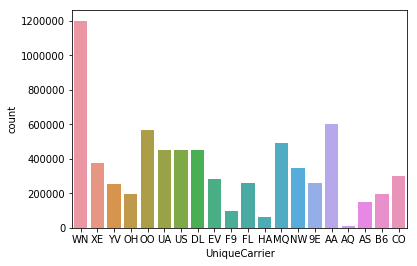

In [13]:
# First, let's plot the carriers frequency

sb.countplot(data = df_2008, x = 'UniqueCarrier');

> Let's use one color.
<br></br>
> Let's order the bars.
<br></br>
> Let's modify y ticks.

In [107]:
# Order carriers ascending for the plot

carrier_order = df_2008.UniqueCarrier.value_counts().index

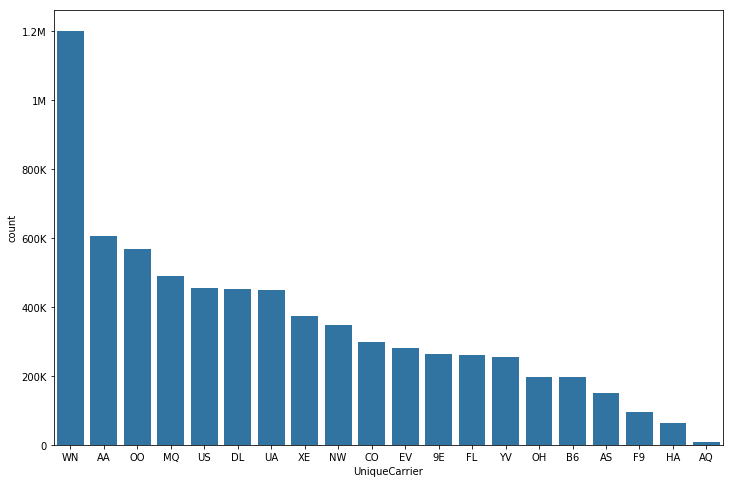

In [15]:
# First, let's plot the carriers frequency

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008, x = 'UniqueCarrier', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);

> Here we can see that the x axis contain un-meaningful values.
<br></br>
> So, we need to merge **df_2008** dataset with **carrier** dataset to get carriers name.

In [16]:
# To get and show carriers name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008, carrier, left_on='UniqueCarrier', right_on='Code')

In [17]:
# To get and show airports name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Origin', right_on='iata')

In [18]:
# Let's see the new columns

df_2008_clean.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
2,2008,1,4,5,813.0,815,1035.0,1040,WN,2622,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
3,2008,1,4,5,1451.0,1450,1653.0,1710,WN,1491,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
4,2008,1,4,5,940.0,940,1140.0,1200,WN,3760,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
5,2008,1,4,5,1043.0,1045,1133.0,1145,WN,470,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
6,2008,1,4,5,630.0,630,714.0,725,WN,511,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
7,2008,1,4,5,2110.0,2100,2156.0,2200,WN,999,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
8,2008,1,4,5,1858.0,1720,1945.0,1820,WN,1394,...,76.0,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
9,2008,1,4,5,1505.0,1505,1550.0,1605,WN,1662,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581


In [19]:
# After the merge
# Let's rename the columns for origin, because we have to do another merge based on Dest column

df_2008_clean.rename(columns = {'Code':'carrier_code', 'Description':'carrier_desc', 'iata':'origin_iata', 
                                'airport':'origin_airport', 'city':'origin_city', 'state':'origin_state', 
                                'country':'origin_country', 'lat':'origin_lat', 'long':'origin_long'}, inplace = True)

In [20]:
# This merge like the prvious one but it is for Dest column to show the destination airports name

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Dest', right_on='iata')

In [21]:
# After the merge
# Let's rename the columns for Dest like what we did for Origin

df_2008_clean.rename(columns = {'iata':'dest_iata', 
                                'airport':'dest_airport', 'city':'dest_city', 'state':'dest_state', 
                                'country':'dest_country', 'lat':'dest_lat', 'long':'dest_long'}, inplace = True)

In [22]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

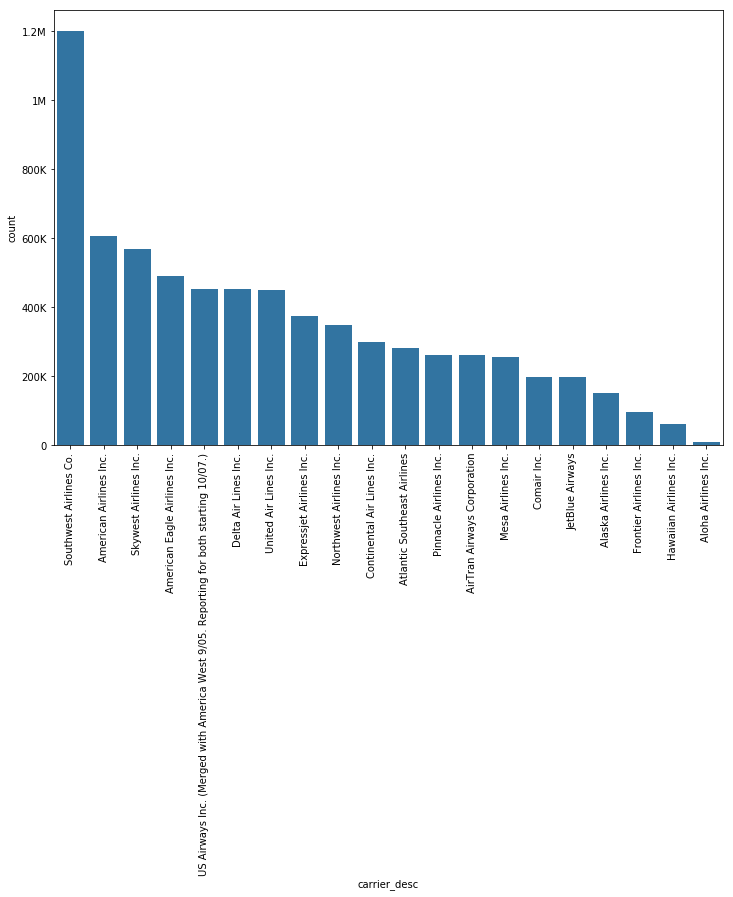

In [23]:
# So, Now we have all carrier names to show them in the plot

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.xticks(rotation = 90);

The distribution is right skewed, also the most heighst bar has almost the double value of the second most one

#### 2- How many flights does each airport has as (origin & destination)

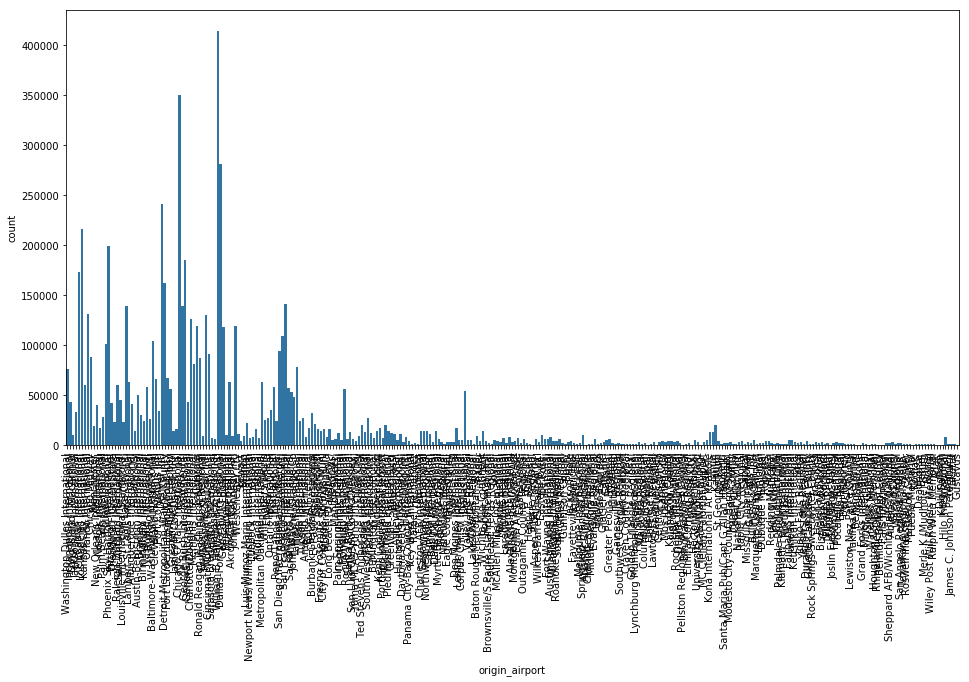

In [24]:
# Now, Let's plot the origin airports frequencies

plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette);
plt.xticks(rotation = 90);

> Let's show only the most 30 airport.
<br></br>
> Let's order the bars.
<br></br>
> Let's modify y ticks.

In [25]:
# Order the values for our plot

origin_order = df_2008_clean.origin_airport.value_counts().index

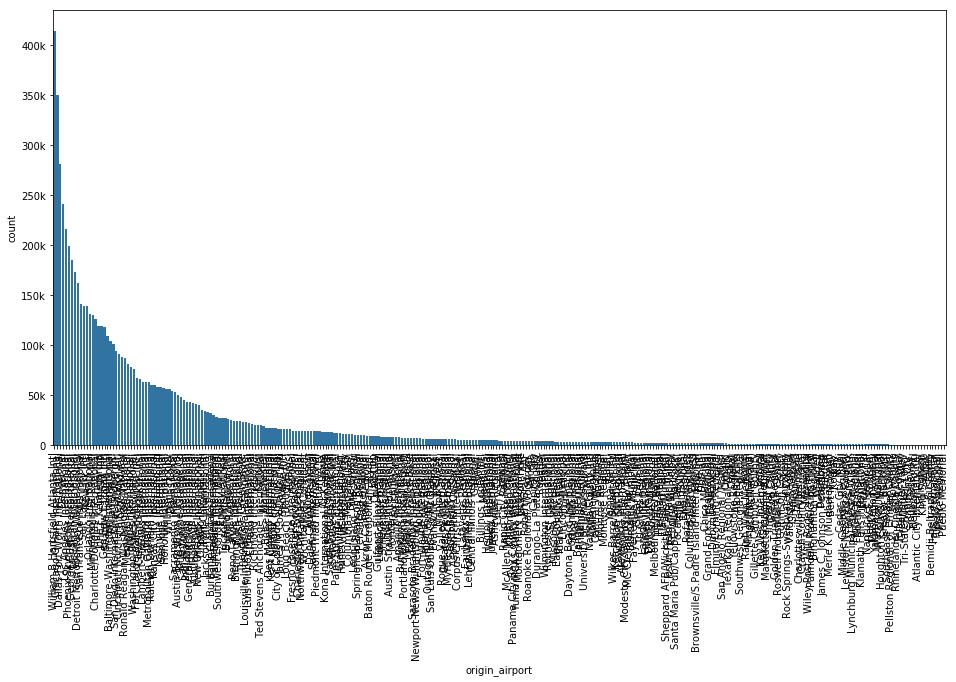

In [26]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [27]:
# To plot only first 30 airports

origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

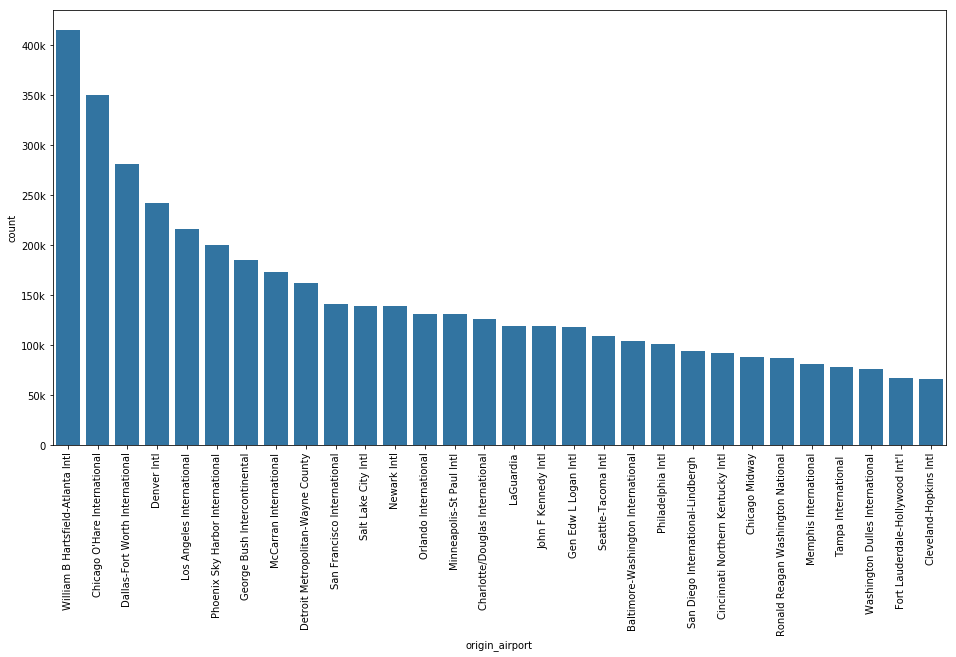

In [28]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

The above plot is for origin airports .. The distribution is right skewed, 
<br></br>
Let's do the same for destination airports.

In [29]:
# Order the values for our plot

dest_order = df_2008_clean.dest_airport.value_counts().index

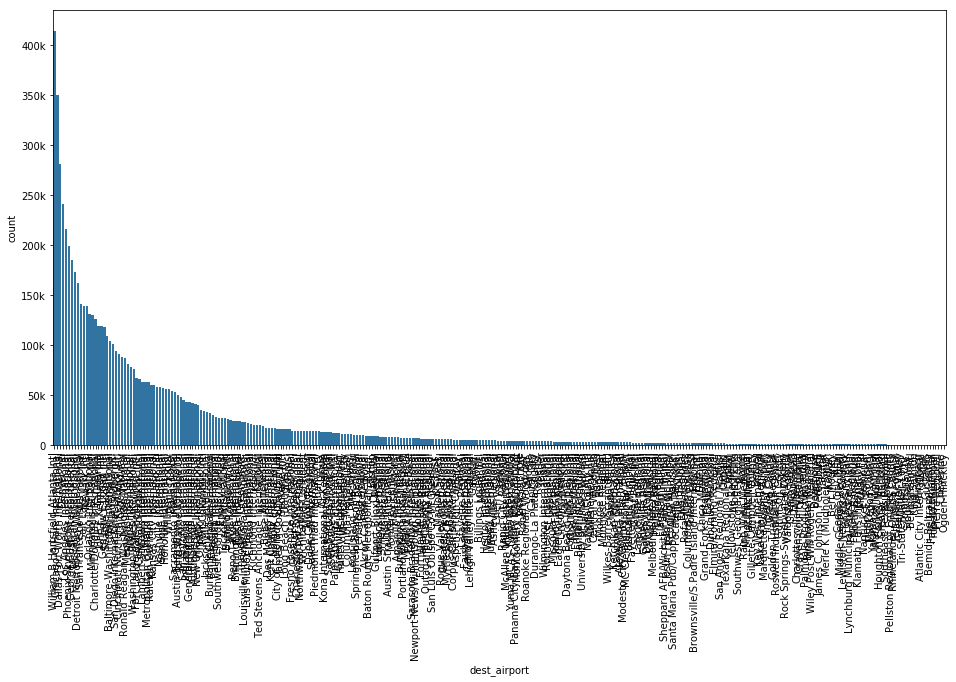

In [30]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [31]:
# To plot only first 30 airports

dest_order2 = df_2008_clean.dest_airport.value_counts().iloc[:30].index

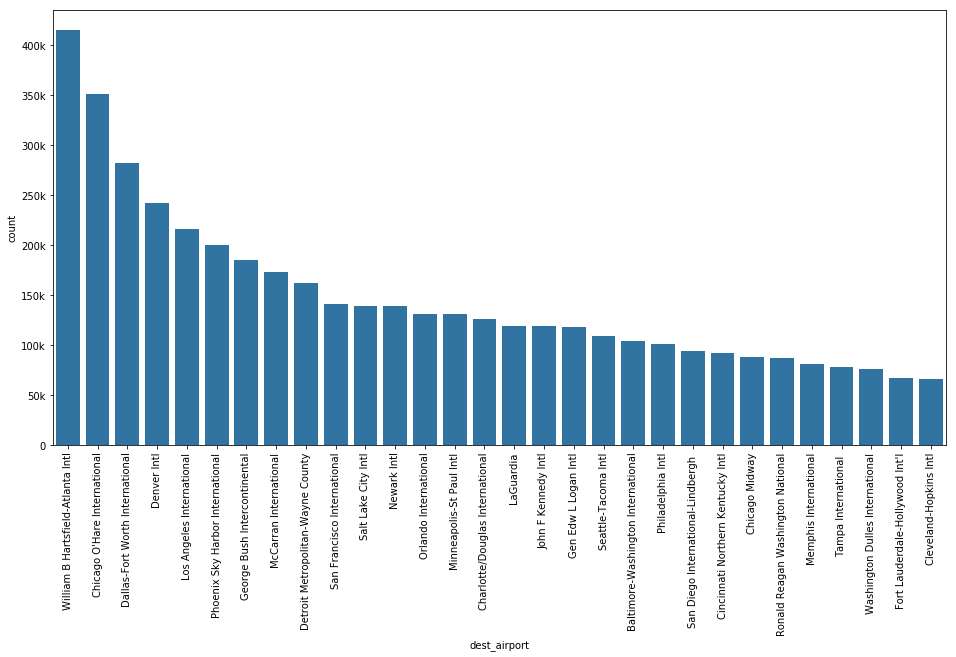

In [32]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

The above plot is for destination airports. The distribution is right skewed, the order is the same for origin at least for these 30 airports which make sence during to for example the size of the airport.

#### 3- The Cause of the Cancelled Flights

In [33]:
# A = carrier, B = weather, C = National Air System 'NAS', D = security

df_2008_clean.groupby('CancellationCode').UniqueCarrier.count()

CancellationCode
A    54330
B    54904
C    28188
D       12
Name: UniqueCarrier, dtype: int64

In [34]:
# Let's systematically show the statistics of cancellation

df_2008_clean.groupby(['Cancelled', 'CancellationCode', 'carrier_desc']).Year.count()

Cancelled  CancellationCode  carrier_desc                                                                       
1          A                 AirTran Airways Corporation                                                             815
                             Alaska Airlines Inc.                                                                   1222
                             Aloha Airlines Inc.                                                                      42
                             American Airlines Inc.                                                                 9609
                             American Eagle Airlines Inc.                                                           3644
                             Atlantic Southeast Airlines                                                            1384
                             Comair Inc.                                                                            1328
                             Continental

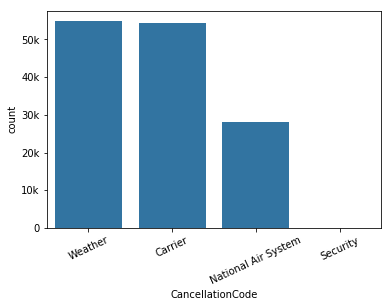

In [35]:
color_palette = sb.color_palette()[0]
labels = ['Weather', 'Carrier', 'National Air System', 'Security']
fig, ax1 = plt.subplots(1,1);
sb.countplot(data = df_2008_clean, x = 'CancellationCode', color = color_palette, ax=ax1, order=['B', 'A', 'C', 'D']);
ax1.set_xticklabels(labels, rotation=25);
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4],['0', '10k', '20k', '30k', '40k', '50k']);

Weather and Carrier are almost the same, while NAS has a half of their value and Security almost has nothing.

#### 4- How Many Flights Does Each Hour Has
Because of the `DepTime` values stored as float, we should find a way to convert it to format like HH:MM
<br></br>
And I am interested in only HH

In [36]:
r = 2003.0
s = 754.0
t = 0030.0
u = 0003.0
d = 00.00
print(r/100, ', HH :', int(r/100))
print(s/100, ', HH :', int(s/100))
print(t/100, ', HH :', int(t/100))
print(u/100, ', HH :', int(u/100))
print(d/100, ', HH :', int(d/100))

20.03 , HH : 20
7.54 , HH : 7
0.3 , HH : 0
0.03 , HH : 0
0.0 , HH : 0


In [37]:
# Now, Let's create a new column called DepTimeHH to store the hour

df_2008_clean['DepTimeHH'] = df_2008_clean['DepTime']/100

In [38]:
# Check if there is any null values

df_2008_clean.DepTimeHH.isnull().sum()

136246

In [39]:
# Fill null values with -1 to distinguish between these null values and other values

df_2008_clean['DepTimeHH'] = df_2008_clean['DepTimeHH'].fillna(-1).astype(int)

In [40]:
# Check if there is any null values

df_2008_clean.DepTimeHH.isnull().sum()

0

In [41]:
# Show the new column DepTimeHH

df_2008_clean.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,DepTimeHH
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
2,2008,1,4,5,2002.0,1955,2208.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
3,2008,1,4,5,734.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
4,2008,1,5,6,2000.0,1955,2214.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
5,2008,1,5,6,731.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
6,2008,1,6,7,1959.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
7,2008,1,6,7,734.0,735,935.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
8,2008,1,7,1,1951.0,1955,2159.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
9,2008,1,7,1,737.0,735,1000.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7


In [42]:
df_2008_clean.groupby('DepTimeHH').DepTime.count()

DepTimeHH
-1          0
 0      19847
 1       5861
 2       1851
 3        833
 4       3390
 5     148167
 6     446737
 7     436700
 8     449224
 9     434850
 10    431460
 11    444702
 12    424249
 13    435917
 14    416875
 15    411126
 16    434017
 17    432488
 18    400784
 19    387288
 20    285991
 21    254850
 22    119651
 23     46103
 24       521
Name: DepTime, dtype: int64

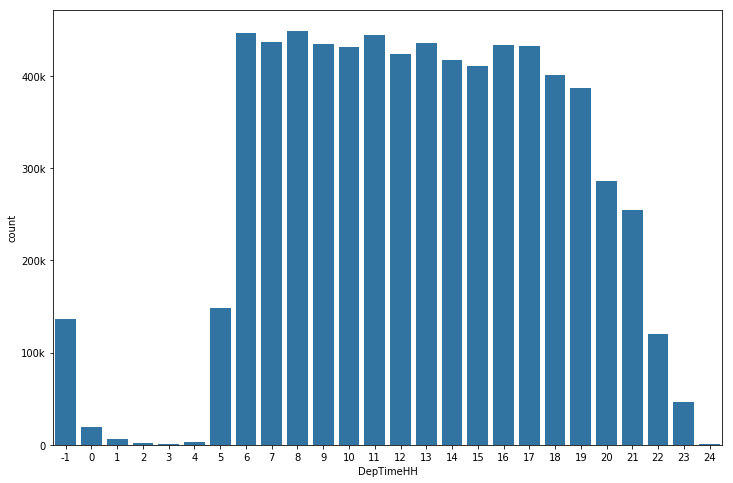

In [43]:
plt.figure(figsize = (12, 8))
color_palatte = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'DepTimeHH', color = color_palette);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);

The plot shows that the peak hours are from 6:00 to 19:00 as we can see, The plot also shows HH = 24, while there is no 24:00 and it seems that it is because of round 2359.5 in the original dataset

In [44]:
# Let's check for DepTime values > 2358.0 in the original dataset

df_2008_clean.query('DepTime > 2358')['DepTime']

6129       2359.0
6151       2400.0
6173       2400.0
6177       2400.0
6251       2400.0
6291       2359.0
6366       2359.0
6374       2359.0
6421       2359.0
40170      2359.0
60148      2359.0
64504      2400.0
68195      2400.0
71857      2400.0
83779      2400.0
99293      2400.0
134282     2359.0
177908     2359.0
211472     2400.0
214228     2400.0
223199     2400.0
238110     2400.0
245604     2359.0
260476     2359.0
260500     2400.0
260547     2400.0
260559     2359.0
260611     2359.0
260741     2359.0
260789     2359.0
            ...  
6707598    2359.0
6707834    2359.0
6708127    2359.0
6708406    2400.0
6708656    2400.0
6708968    2400.0
6718666    2359.0
6743088    2400.0
6747230    2359.0
6754698    2400.0
6767719    2359.0
6774046    2400.0
6780457    2400.0
6792128    2400.0
6799658    2359.0
6799768    2400.0
6800306    2400.0
6807481    2359.0
6823324    2400.0
6838868    2400.0
6840153    2400.0
6840163    2359.0
6841534    2359.0
6865483    2400.0
6869670   

#### 5- Delay Analysis:
We should notice that we have two main features for delay:
<br></br>
1- **ArrDelay:** arrival delay, in minutes
<br></br>
2- **DepDelay:** departure delay, in minutes
<br></br>
And the **`ArrDelay`** has 5 additional features : `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`
<br></br>
The **`ArrDelay`** is **not necessary** the sum of these features.

In [45]:
# Create a new dataframe called delay to store the dealy features

delay = df_2008_clean[["carrier_desc", "origin_airport","ArrDelay" , "DepDelay", "CarrierDelay", "WeatherDelay", 
                       "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

In [46]:
# Store only non null values

delay = delay.query('ArrDelay >= 0 and DepDelay >= 0')

In [47]:
# Show the new dataframe
delay #.head(10)

,carrier_desc,origin_airport,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,Southwest Airlines Co.,Washington Dulles International,2.0,19.0,NaN,NaN,NaN,NaN,NaN
9,Southwest Airlines Co.,Washington Dulles International,0.0,2.0,NaN,NaN,NaN,NaN,NaN
21,Southwest Airlines Co.,Washington Dulles International,45.0,58.0,0.0,0.0,0.0,0.0,45.0
28,Southwest Airlines Co.,Washington Dulles International,3.0,11.0,NaN,NaN,NaN,NaN,NaN
29,Southwest Airlines Co.,Washington Dulles International,83.0,64.0,0.0,0.0,19.0,0.0,64.0
30,Southwest Airlines Co.,Washington Dulles International,35.0,26.0,26.0,0.0,9.0,0.0,0.0
33,Southwest Airlines Co.,Washington Dulles International,20.0,12.0,0.0,0.0,20.0,0.0,0.0
51,Southwest Airlines Co.,Washington Dulles International,13.0,45.0,NaN,NaN,NaN,NaN,NaN
59,Southwest Airlines Co.,Washington Dulles International,50.0,69.0,2.0,0.0,0.0,0.0,48.0
62,Southwest Airlines Co.,Washington Dulles International,23.0,39.0,0.0,0.0,0.0,0.0,23.0


In [48]:
# Show systematically statistics

delay.describe()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.320755e+06,2.320755e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06
mean,3.796759e+01,3.545326e+01,1.761196e+01,3.395101e+00,1.599602e+01,8.380293e-02,2.316181e+01
std,5.266902e+01,5.133333e+01,4.199411e+01,2.058803e+01,3.294767e+01,1.943037e+00,4.082838e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,1.800000e+01,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,4.700000e+01,4.500000e+01,1.900000e+01,0.000000e+00,1.800000e+01,0.000000e+00,3.000000e+01
max,2.461000e+03,2.467000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [49]:
# Total number of delays pre carrier

delay.carrier_desc.value_counts()

Southwest Airlines Co.                                                                 445542
American Airlines Inc.                                                                 218895
Skywest Airlines Inc.                                                                  163844
American Eagle Airlines Inc.                                                           163371
United Air Lines Inc.                                                                  158197
Delta Air Lines Inc.                                                                   142698
Expressjet Airlines Inc.                                                               121373
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    115316
Continental Air Lines Inc.                                                             114653
Northwest Airlines Inc.                                                                 98701
Atlantic Southeast Airlines                                 

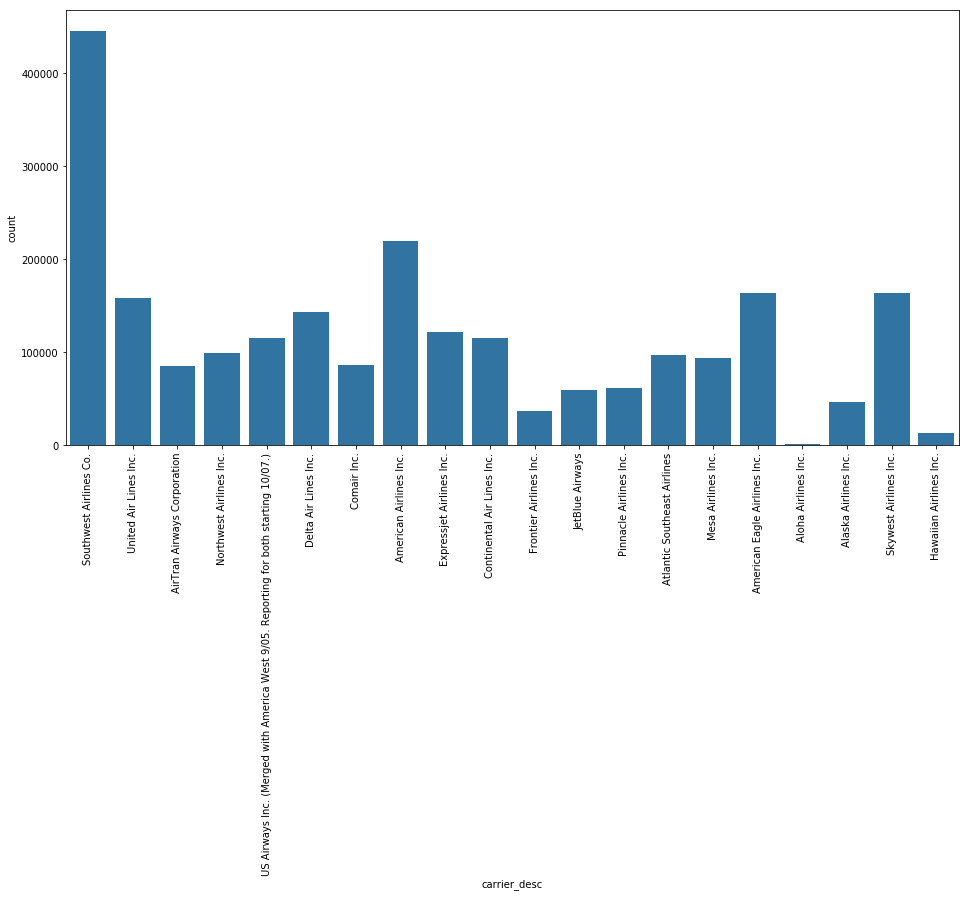

In [50]:
# Plot the Total number of delays pre carrier

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette);
plt.xticks(rotation=90);

In [51]:
# Order the value for the plot

order_c = delay['carrier_desc'].value_counts().index

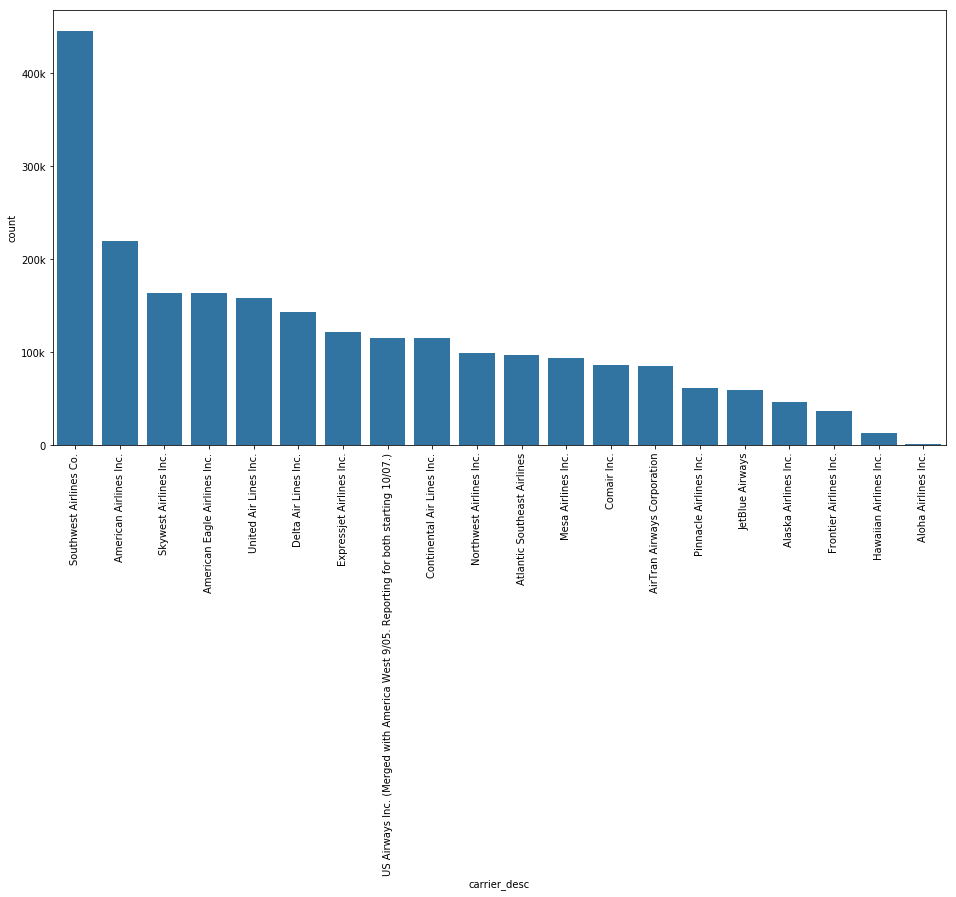

In [52]:
# Plot the Total number of delays pre carrier with bars order

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette, order = order_c);
plt.xticks(rotation=90);
plt.yticks([0, 100e3, 200e3, 300e3, 400e3],['0', '100k', '200k', '300k', '400k']);

This plot show the total number of delay per carrier. But we need the plot to be as proportions to get an accurate conclusions.

I need a bar for carrier_desc count() and another bar for delay_period count()

I need a bar for carrier_desc count() and another bar for delay_period sum()

This way I can see the percentages for each carrier in terms of delay

In [53]:
# Let's count how many time each carrier flights have a (ArrDelay or DepDelay) delay

delay.groupby(['carrier_desc']).ArrDelay.count()

carrier_desc
AirTran Airways Corporation                                                             84420
Alaska Airlines Inc.                                                                    45955
Aloha Airlines Inc.                                                                      1418
American Airlines Inc.                                                                 218895
American Eagle Airlines Inc.                                                           163371
Atlantic Southeast Airlines                                                             96840
Comair Inc.                                                                             85960
Continental Air Lines Inc.                                                             114653
Delta Air Lines Inc.                                                                   142698
Expressjet Airlines Inc.                                                               121373
Frontier Airlines Inc.                         

In [54]:
# Show The proportion of number of times for Delay (ArrDelay or DepDelay) depending on the number of flights for 2008

delay.groupby(['carrier_desc']).ArrDelay.count() / df_2008_clean.carrier_desc.value_counts()

AirTran Airways Corporation                                                            0.322603
Alaska Airlines Inc.                                                                   0.304132
Aloha Airlines Inc.                                                                    0.181795
American Airlines Inc.                                                                 0.361879
American Eagle Airlines Inc.                                                           0.332939
Atlantic Southeast Airlines                                                            0.345148
Comair Inc.                                                                            0.435005
Continental Air Lines Inc.                                                             0.384155
Delta Air Lines Inc.                                                                   0.315752
Expressjet Airlines Inc.                                                               0.324085
Frontier Airlines Inc.                  

In [55]:
# The total number of DepDelay in Hours

delay.groupby(['carrier_desc']).DepDelay.sum()/60

carrier_desc
AirTran Airways Corporation                                                             50047.816667
Alaska Airlines Inc.                                                                    24340.116667
Aloha Airlines Inc.                                                                       329.100000
American Airlines Inc.                                                                 146088.183333
American Eagle Airlines Inc.                                                           102196.033333
Atlantic Southeast Airlines                                                             65411.783333
Comair Inc.                                                                             42422.216667
Continental Air Lines Inc.                                                              69939.416667
Delta Air Lines Inc.                                                                    73150.150000
Expressjet Airlines Inc.                                                      

In [56]:
# The total number of ArrDelay in Hours

delay.groupby(['carrier_desc']).ArrDelay.sum()/60

carrier_desc
AirTran Airways Corporation                                                             55183.266667
Alaska Airlines Inc.                                                                    25741.616667
Aloha Airlines Inc.                                                                       339.666667
American Airlines Inc.                                                                 158608.566667
American Eagle Airlines Inc.                                                           112556.633333
Atlantic Southeast Airlines                                                             68635.616667
Comair Inc.                                                                             52126.766667
Continental Air Lines Inc.                                                              74595.216667
Delta Air Lines Inc.                                                                    84555.583333
Expressjet Airlines Inc.                                                      

In [57]:
# Create a new dataframe called delay_prop to store the proportion of delay (ArrDelay or DepDelay) per carrier

d = {'prop': delay.groupby(['carrier_desc']).DepDelay.count() / df_2008_clean.carrier_desc.value_counts()}
delay_prop = pd.DataFrame(data=d)
delay_prop.reset_index(level=0, inplace=True)
delay_prop.rename(columns = {'index': 'carrier_desc'}, inplace=True)
delay_prop

,carrier_desc,prop
0,AirTran Airways Corporation,0.322603
1,Alaska Airlines Inc.,0.304132
2,Aloha Airlines Inc.,0.181795
3,American Airlines Inc.,0.361879
4,American Eagle Airlines Inc.,0.332939
5,Atlantic Southeast Airlines,0.345148
6,Comair Inc.,0.435005
7,Continental Air Lines Inc.,0.384155
8,Delta Air Lines Inc.,0.315752
9,Expressjet Airlines Inc.,0.324085


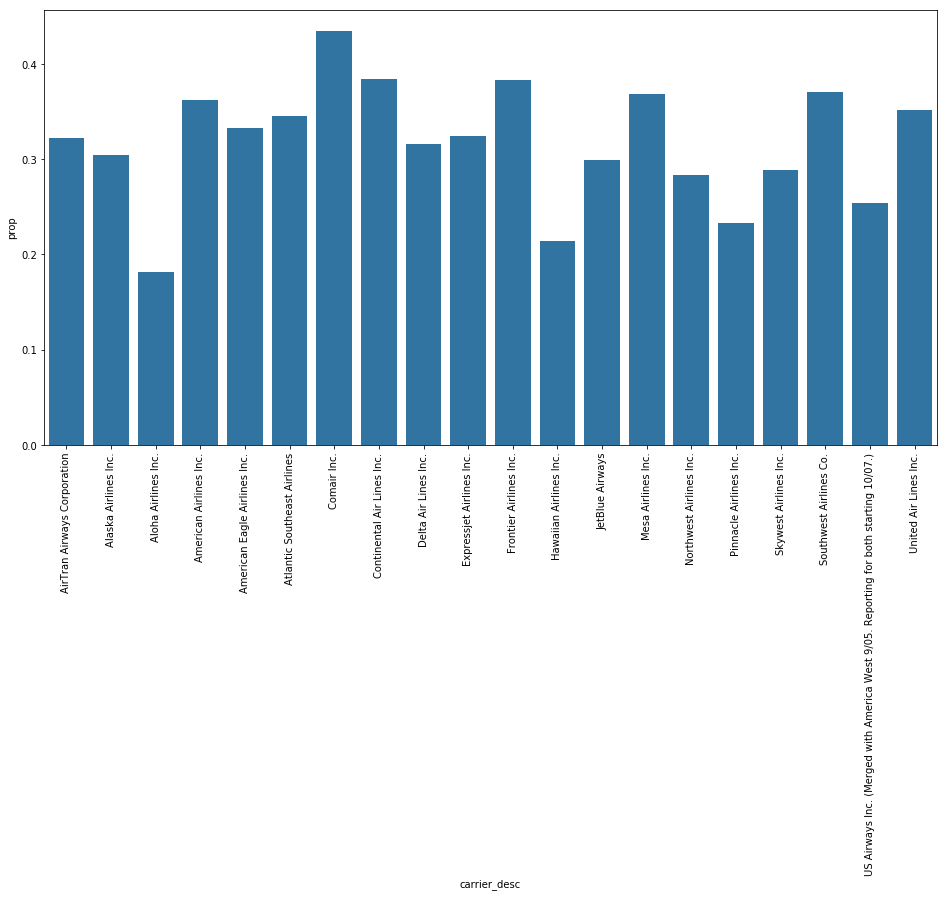

In [58]:
# plot the delay_prop (ArrDelay or DepDelay)

plt.figure(figsize=(16,8))
sb.barplot(data = delay_prop, x = 'carrier_desc', y = 'prop', color = color_palatte);
plt.xticks(rotation=90);

In [59]:
# Order the values for the plot

delay_prop = pd.DataFrame(data = delay_prop[['carrier_desc','prop']].sort_values(by='prop',ascending=False))
delay_prop.reset_index(drop=True, inplace=True)
delay_prop

,carrier_desc,prop
0,Comair Inc.,0.435005
1,Continental Air Lines Inc.,0.384155
2,Frontier Airlines Inc.,0.382835
3,Southwest Airlines Co.,0.370743
4,Mesa Airlines Inc.,0.368140
5,American Airlines Inc.,0.361879
6,United Air Lines Inc.,0.351928
7,Atlantic Southeast Airlines,0.345148
8,American Eagle Airlines Inc.,0.332939
9,Expressjet Airlines Inc.,0.324085


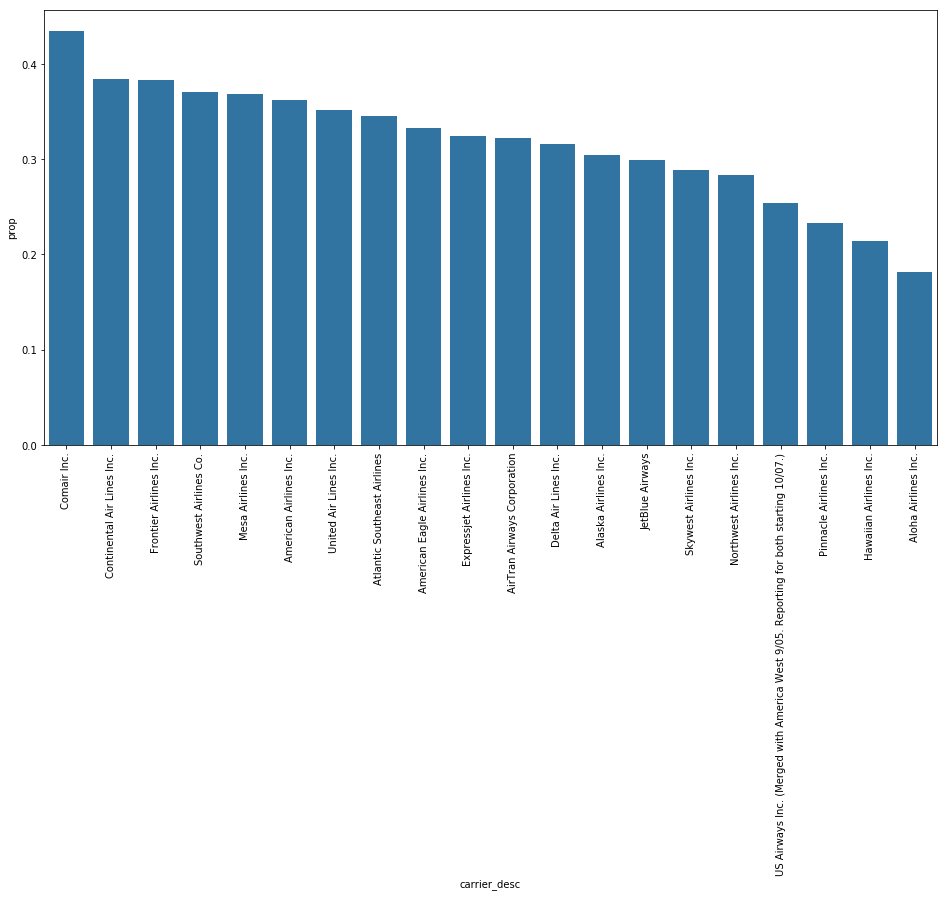

In [60]:
# Plot the ordered delay_prop

plt.figure(figsize=(16,8))
sb.barplot(data = delay_prop, x = 'carrier_desc', y = 'prop', color = color_palatte);
plt.xticks(rotation=90);

In [61]:
df_2008_clean.query('carrier_desc == "American Airlines Inc."').UniqueCarrier.count()

604885

In [62]:
delay.query('carrier_desc == "American Airlines Inc."').carrier_desc.count()

218895

numpy: 1.15.4
matplotlib: 3.0.2


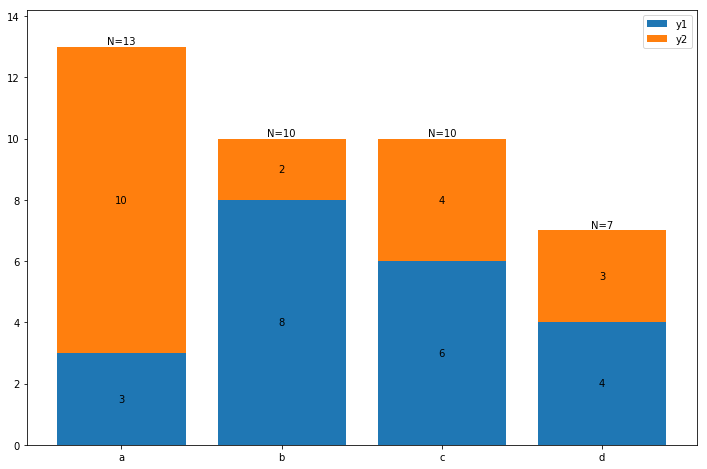

In [63]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

x = ["a","b","c","d"]
y1 = np.array([3,8,6,4])
y2 = np.array([10,2,4,3])

plt.figure(figsize=(12,8))

plt.bar(x, y1, label='y1')
plt.bar(x, y2 ,bottom=y1,label='y2')


# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2, y1+y2):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,14.2)

plt.legend()


In [64]:
# Show systematically statistics

delay.describe()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.320755e+06,2.320755e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06,1.363926e+06
mean,3.796759e+01,3.545326e+01,1.761196e+01,3.395101e+00,1.599602e+01,8.380293e-02,2.316181e+01
std,5.266902e+01,5.133333e+01,4.199411e+01,2.058803e+01,3.294767e+01,1.943037e+00,4.082838e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,1.800000e+01,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,4.700000e+01,4.500000e+01,1.900000e+01,0.000000e+00,1.800000e+01,0.000000e+00,3.000000e+01
max,2.461000e+03,2.467000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


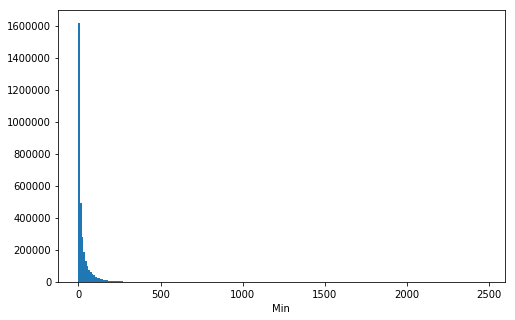

In [65]:
binsize = 10
bins = np.arange(0, df_2008_clean['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2008_clean, x = 'DepDelay', bins = bins)
plt.xlabel('Min')
plt.show()

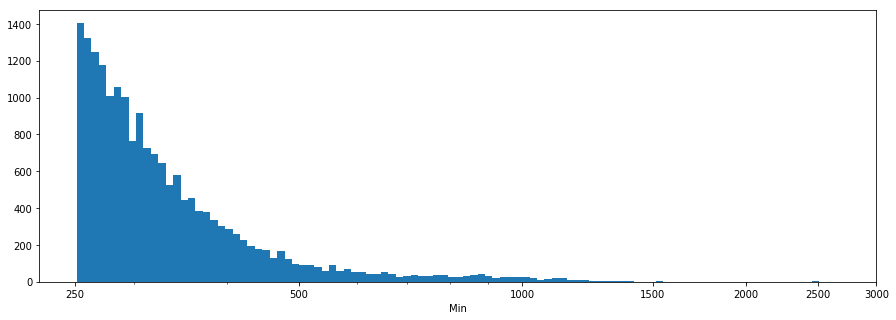

In [66]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10(df_2008_clean['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df_2008_clean, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 1000, 1500, 2000, 2500, 3000], [250, 500, 1000, 1500, 2000, 2500, 3000])
plt.xlabel('Min')
plt.show()

## Bivariate Exploration

To start off with, Let's add another variable "Month" for both plots carrier freq. & origin_airport freq.

In [110]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

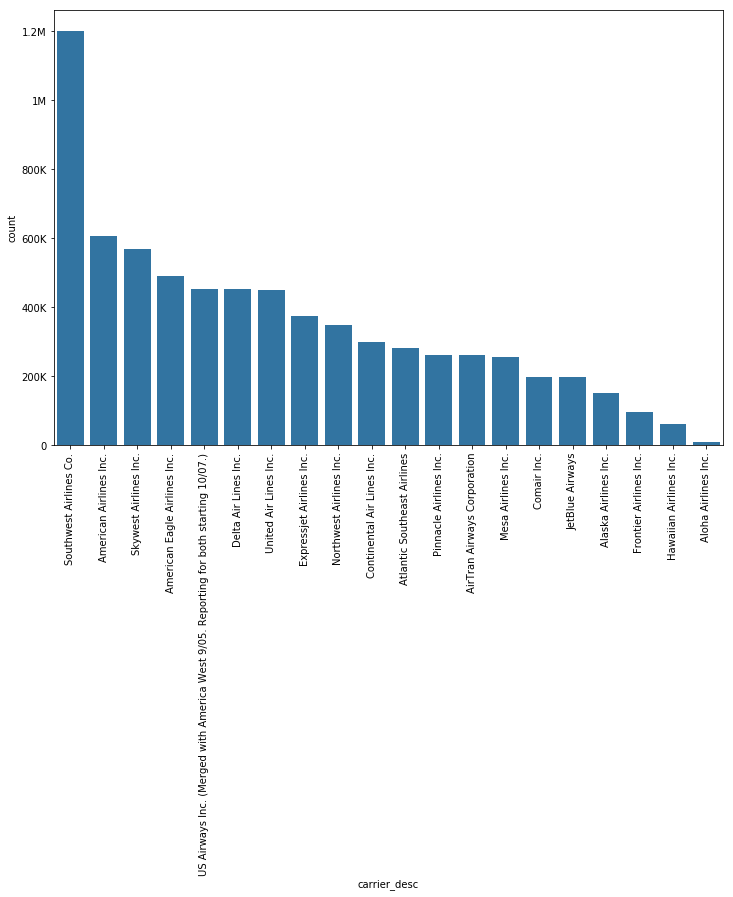

In [111]:
# So, Now we have all carrier names to show them in the plot

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.xticks(rotation = 90);

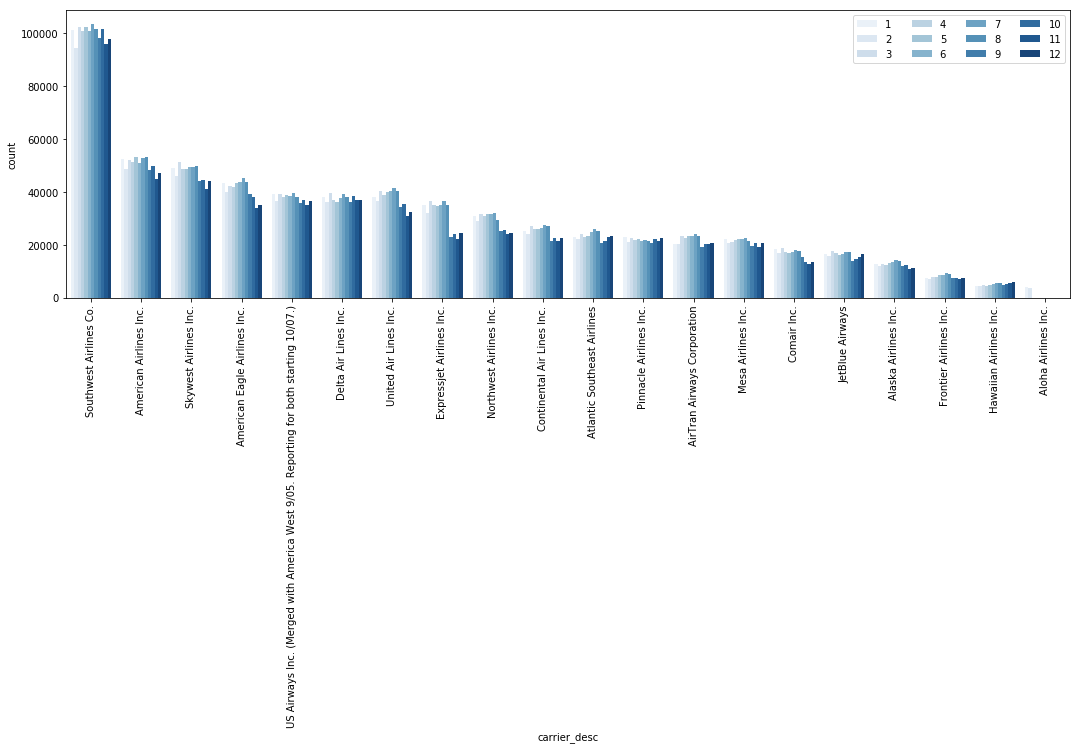

In [112]:
# We started the Univariate Exploration with the number of filghts per Carrier
# Let's have a look for the same plot but with another variable "Month"
# With the same order

# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [18, 18])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_2008_clean, x = 'carrier_desc', hue = 'Month', palette = 'Blues', order = carrier_order)
plt.xticks(rotation=90)
plt.legend(loc = 1, ncol = 4) # re-arrange legend to remove overlapping

plt.show()

We can see that most of Carriers has a fewer numbers of flights on Nov(11) than the rest of months

In [114]:
# To plot only first 30 airports

origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

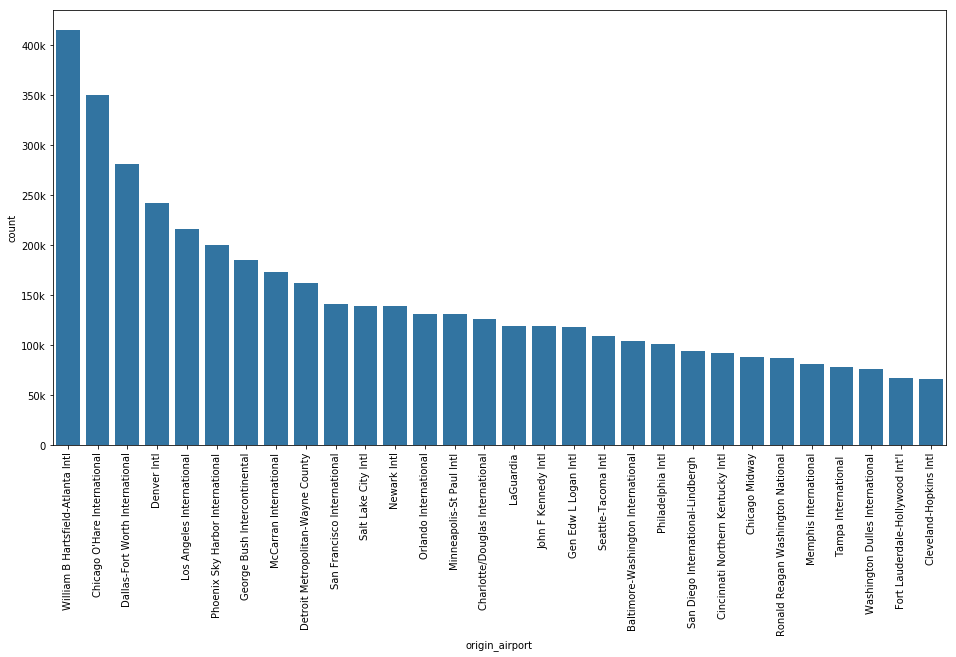

In [115]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

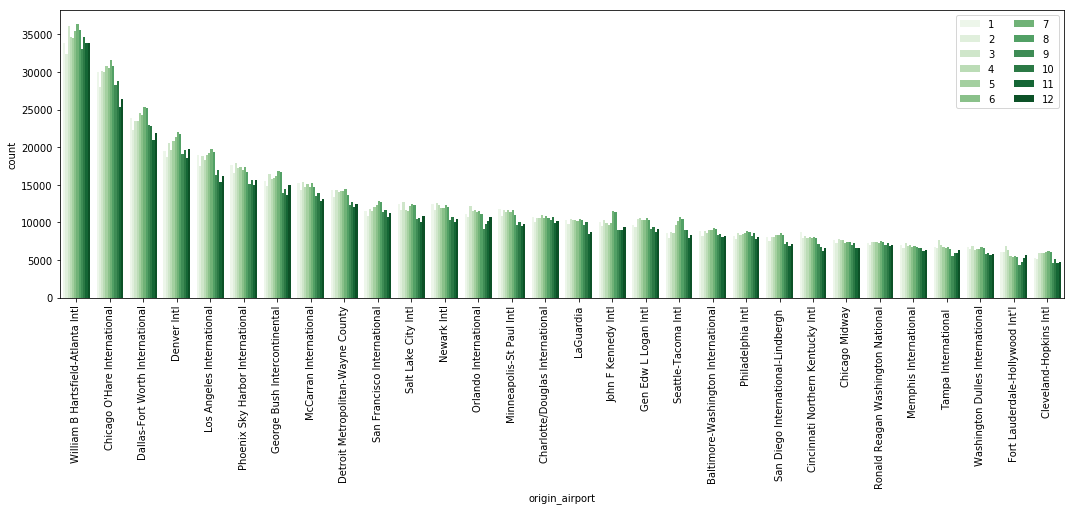

In [119]:
plt.figure(figsize = [18, 18])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_2008_clean, x = 'origin_airport', hue = 'Month', palette = 'Greens', order = origin_order2);
#plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
#                                                                '350k', '400k']);
plt.xticks(rotation=90)
plt.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

I want to look at the pairwise correlations present between Delay features in the data.

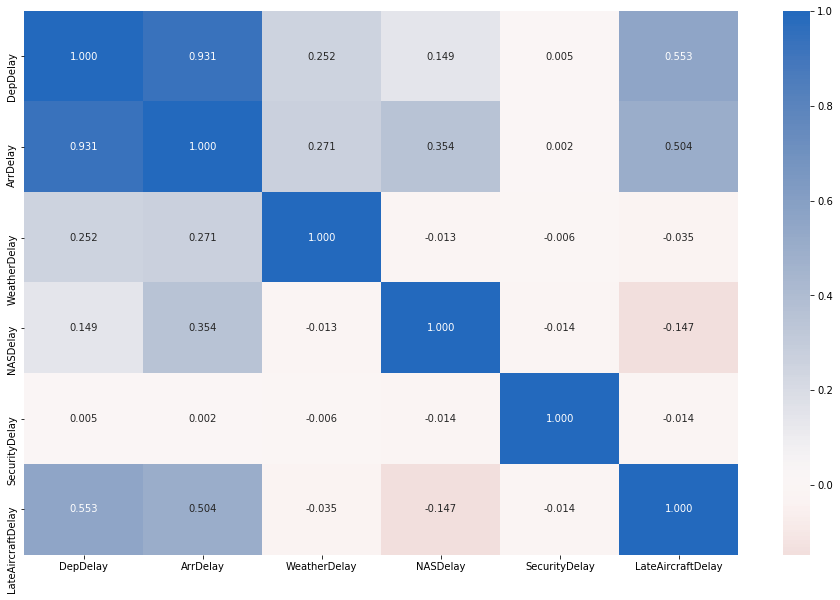

In [67]:
# correlation plot

numeric_vars = ['DepDelay', 'ArrDelay' , 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize = [16, 10])
sb.heatmap(df_2008_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As we can see `DepDelay` has positive strong correlation with `ArrDelay` and it is natural to be positive strong since any depature delay will cause a delay in the arrival time.
<br></br>
Also there is a mid positive correlation between 'LateAircraftDelay' and the delay in both `DepDelay` & `ArrDelay` 

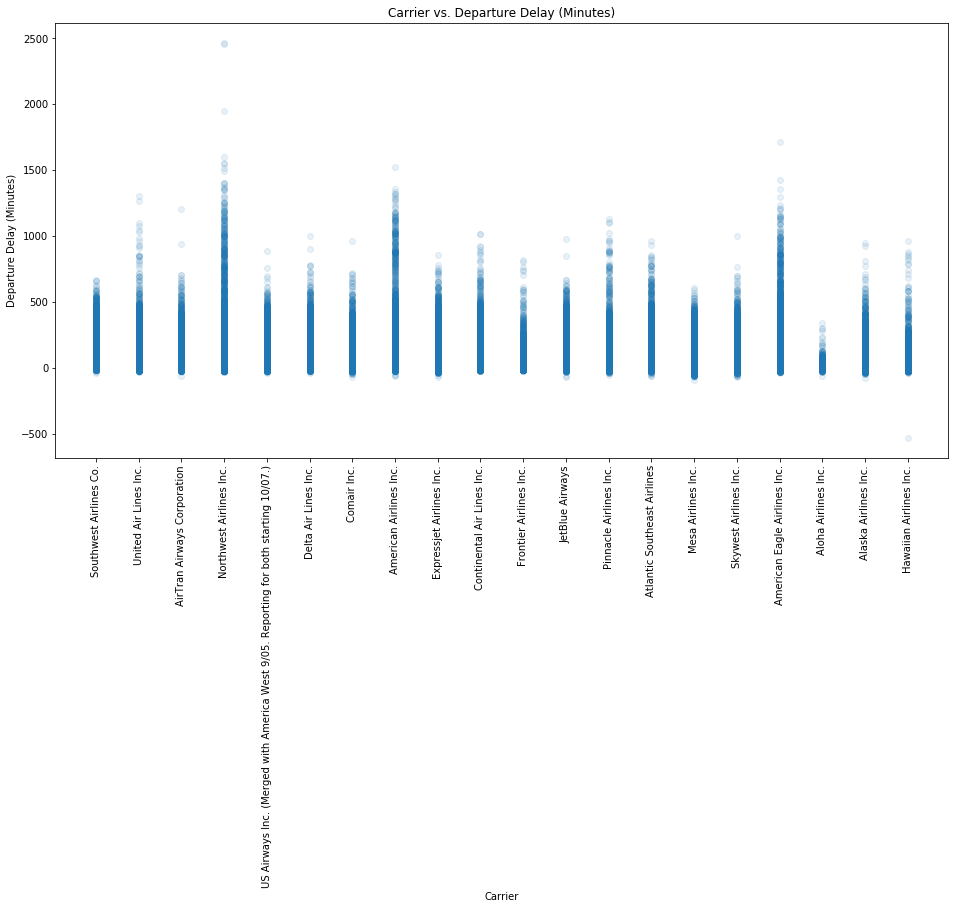

In [68]:
# scatter plot of carrier_desc vs. DepDelay

plt.figure(figsize = [16, 8])
plt.scatter(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay', alpha = 1/10)
plt.xlabel('Carrier')
plt.xticks(rotation=90)
plt.ylabel('Departure Delay (Minutes)')
plt.title('Carrier vs. Departure Delay (Minutes)')
plt.show()

As we can see from the plot, most of the carriers have a lot of flights delay reaches to 500 Minutes ~ 8 Hours & 20 Minutes.
<br></br>
The **worst** carriers in terms of `DepDelay` are :
<br></br>
> 1- Northwest Airlines Inc.
<br></br>
> 2- American Eagle Airlines Inc.
<br></br>
> 3- American Airlines Inc.

While the **best** one is :
<br></br>
> 1- Aloha Airlines Inc.
<br></br>
> 2- Mesa Airlines Inc.
<br></br>
> 3- Southwest Airlines Co.

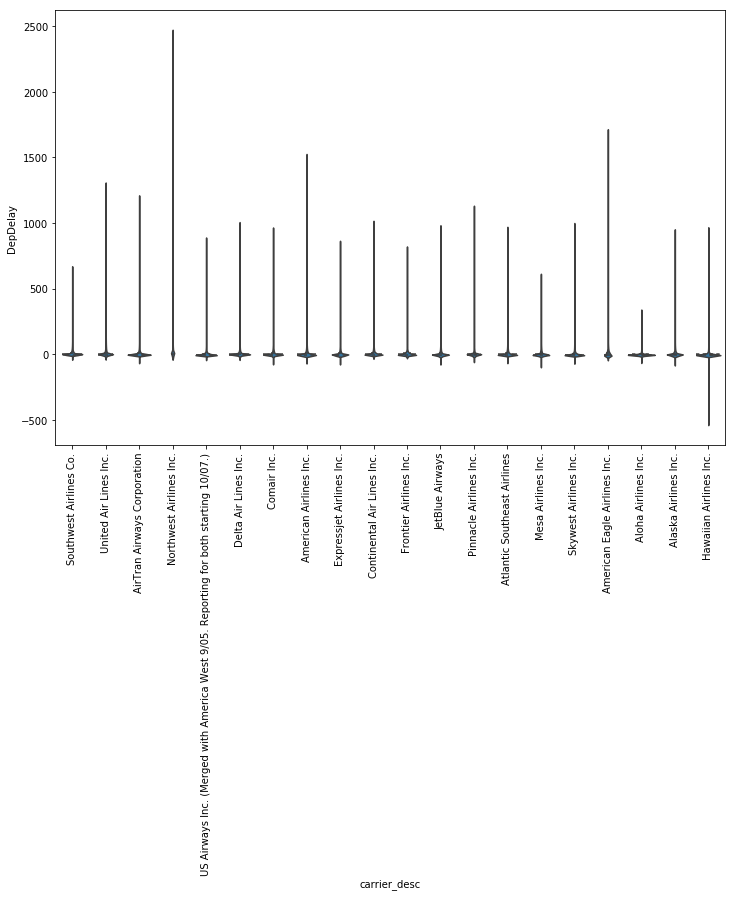

In [69]:
# Let's use the Violin Polt for these two features:

plt.figure(figsize = (12, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 90);

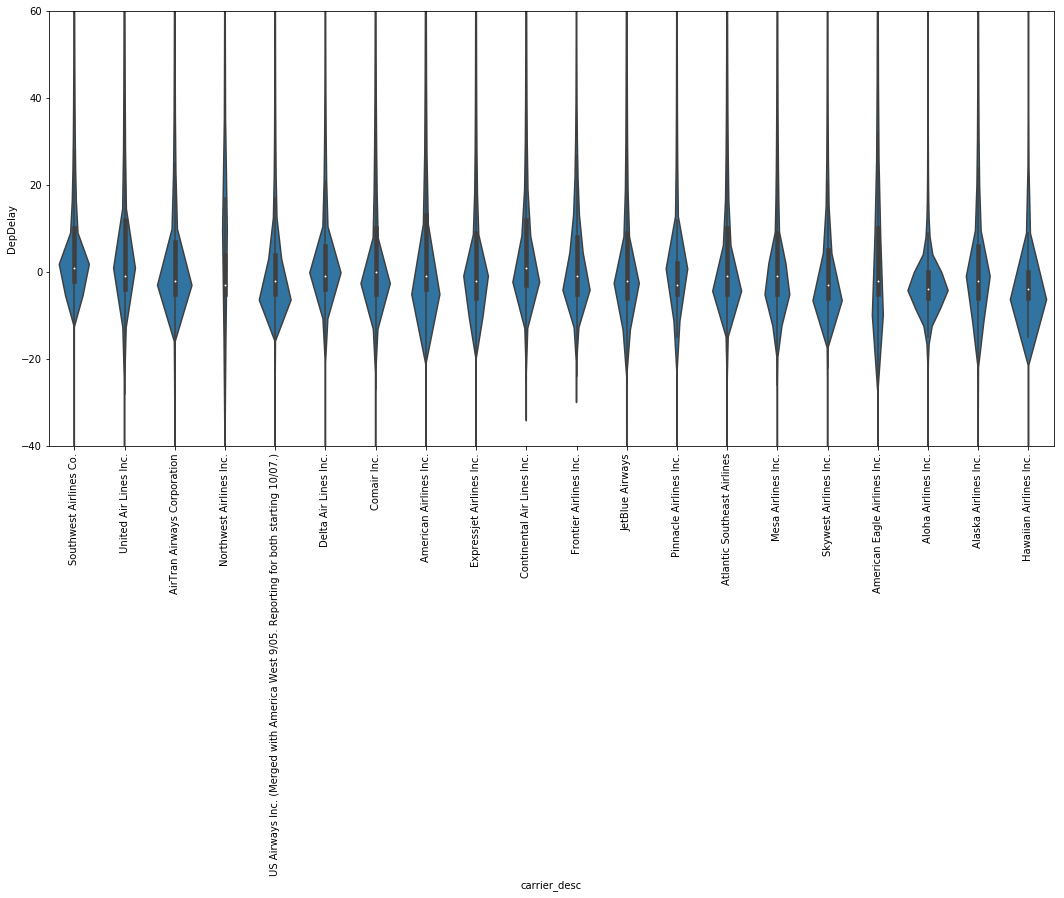

In [70]:
# Let's look closely to the Violin Polt for these two features with limit on y axis :

plt.figure(figsize = (18, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = df_2008_clean, x = 'carrier_desc', y = 'DepDelay',
              color = base_color);
plt.ylim([-40, 60])
plt.xticks(rotation = 90);

Now the judgment differ, here with violin plot we can see that :
<br></br>
Northwest Airlines Inc. has a slim shape with median less than zero.
<br></br>
Also American Eagle Airlines Inc. has the second most slim shape with also mean less than zero

In [71]:
# Let's see the mean of each carrier delays:

df_2008_clean.groupby('carrier_desc').DepDelay.mean()

carrier_desc
AirTran Airways Corporation                                                             9.262713
Alaska Airlines Inc.                                                                    6.848722
Aloha Airlines Inc.                                                                    -1.397783
American Airlines Inc.                                                                 13.280898
American Eagle Airlines Inc.                                                           10.695642
Atlantic Southeast Airlines                                                            11.922538
Comair Inc.                                                                            11.536153
Continental Air Lines Inc.                                                             13.185230
Delta Air Lines Inc.                                                                    8.007766
Expressjet Airlines Inc.                                                               11.395866
Frontier Airlines

In [72]:
df_2008_clean.groupby('carrier_desc').DepDelay.median()

carrier_desc
AirTran Airways Corporation                                                           -2.0
Alaska Airlines Inc.                                                                  -2.0
Aloha Airlines Inc.                                                                   -4.0
American Airlines Inc.                                                                -1.0
American Eagle Airlines Inc.                                                          -2.0
Atlantic Southeast Airlines                                                           -1.0
Comair Inc.                                                                            0.0
Continental Air Lines Inc.                                                             1.0
Delta Air Lines Inc.                                                                  -1.0
Expressjet Airlines Inc.                                                              -2.0
Frontier Airlines Inc.                                                       

g = sb.FacetGrid(data = df_2008_clean, col = 'carrier_desc', row = 'origin_airport',
                 margin_titles = True);
g.map(plt.scatter,'DepDelay', 'ArrDelay');

sb.regplot(data = df_2008_clean, x = 'carrier_desc', y = 'origin_airport',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : df_2008_clean['DepDelay']});
plt.xlabel('Carrier')
plt.ylabel('Origin Airport');

In [73]:
# To plot only first 30 airports

dest_order2 = df_2008_clean.dest_airport.value_counts().iloc[:30].index

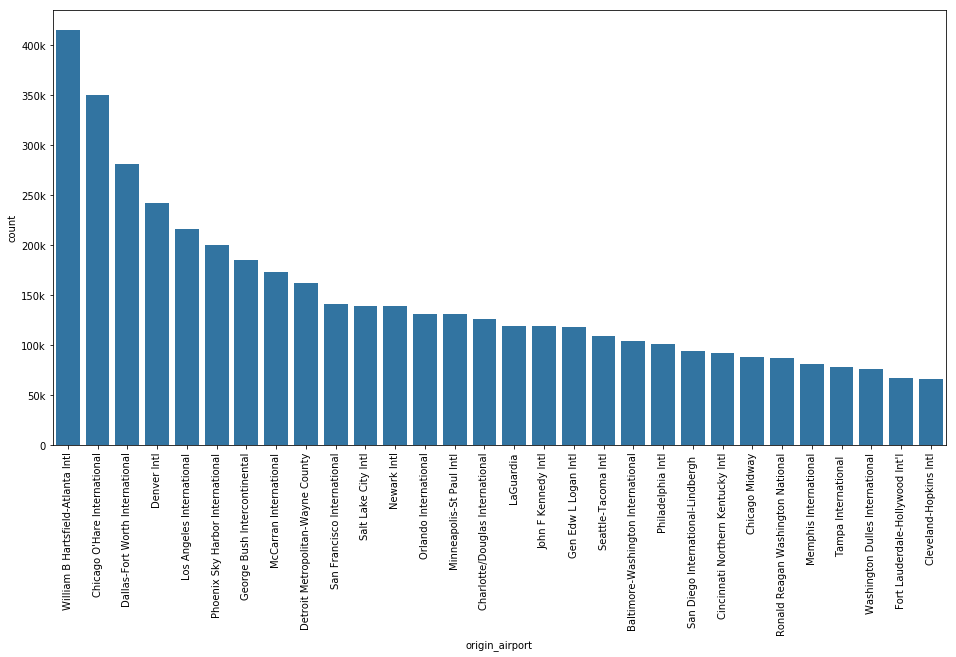

In [74]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

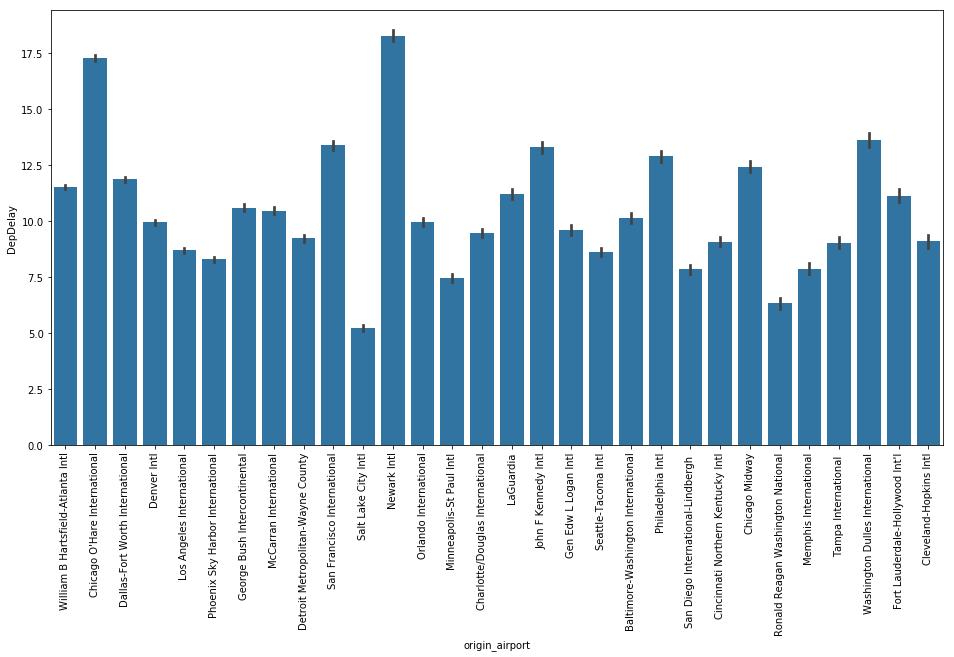

In [75]:
# Plot origin_airport vs. DepDelay

plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.barplot(data = df_2008_clean, x = 'origin_airport', y = 'DepDelay', color = color_palette, order = origin_order2);
#plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
#                                                                '350k', '400k']);
plt.xticks(rotation = 90);

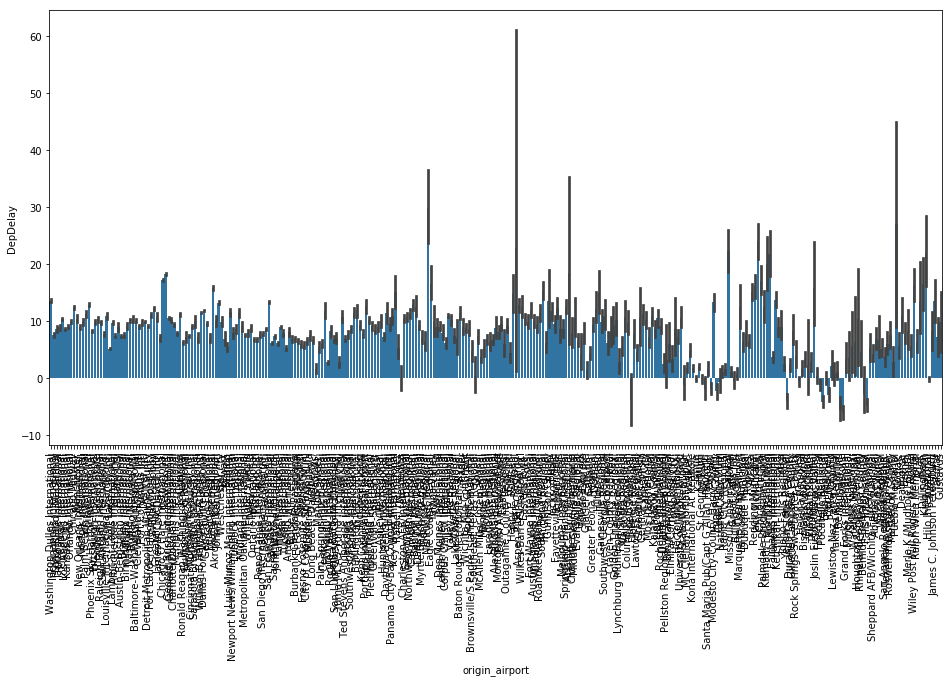

In [76]:
# Plot origin_airport vs. DepDelay

plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.barplot(data = df_2008_clean, x = 'origin_airport', y = 'DepDelay', color = color_palette);
#plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
#                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [77]:
# Let's order the most 30 airports (mean)

DepDelay_mean_order = df_2008_clean.groupby('origin_airport').DepDelay.mean().sort_values(ascending=False).iloc[:30].index

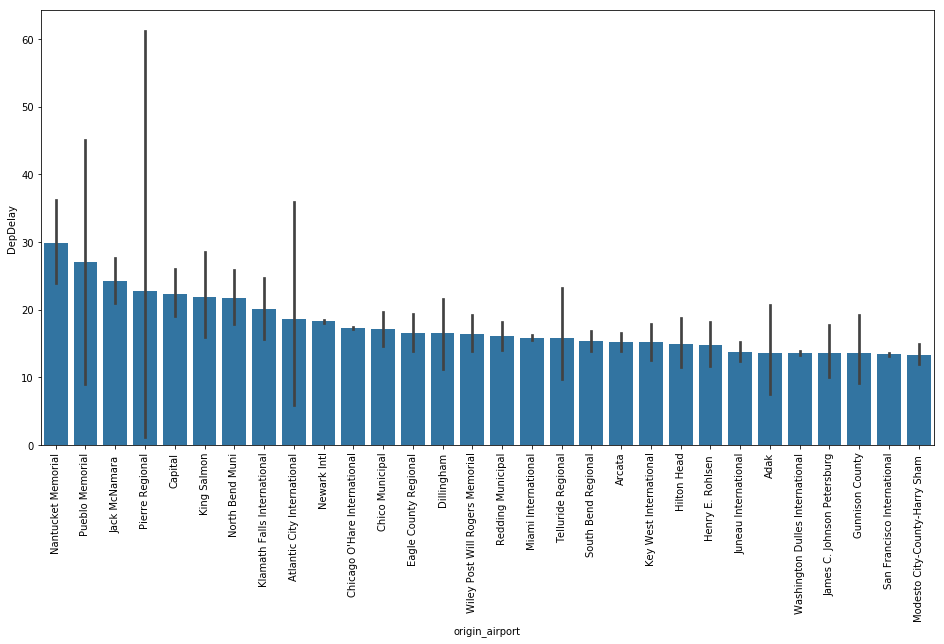

In [78]:
# Plot origin_airport vs. DepDelay (mean) for the most 30 airports

plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.barplot(data = df_2008_clean, x = 'origin_airport', y = 'DepDelay', color = color_palette, order = DepDelay_mean_order);
#plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
#                                                                '350k', '400k']);
plt.xticks(rotation = 90);

## Multivariate Exploration

The most important multivatiate plot will be `carrier` vs. `origin_airport` vs. `DepDelay`

In [91]:
# Let's take only 5 most carrier from delay dataset, and 5 most origin_airport from delay dataset

origin_order = delay.origin_airport.value_counts().iloc[:5].index
order_c = delay['carrier_desc'].value_counts().iloc[:5].index

C:\Users\raied\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


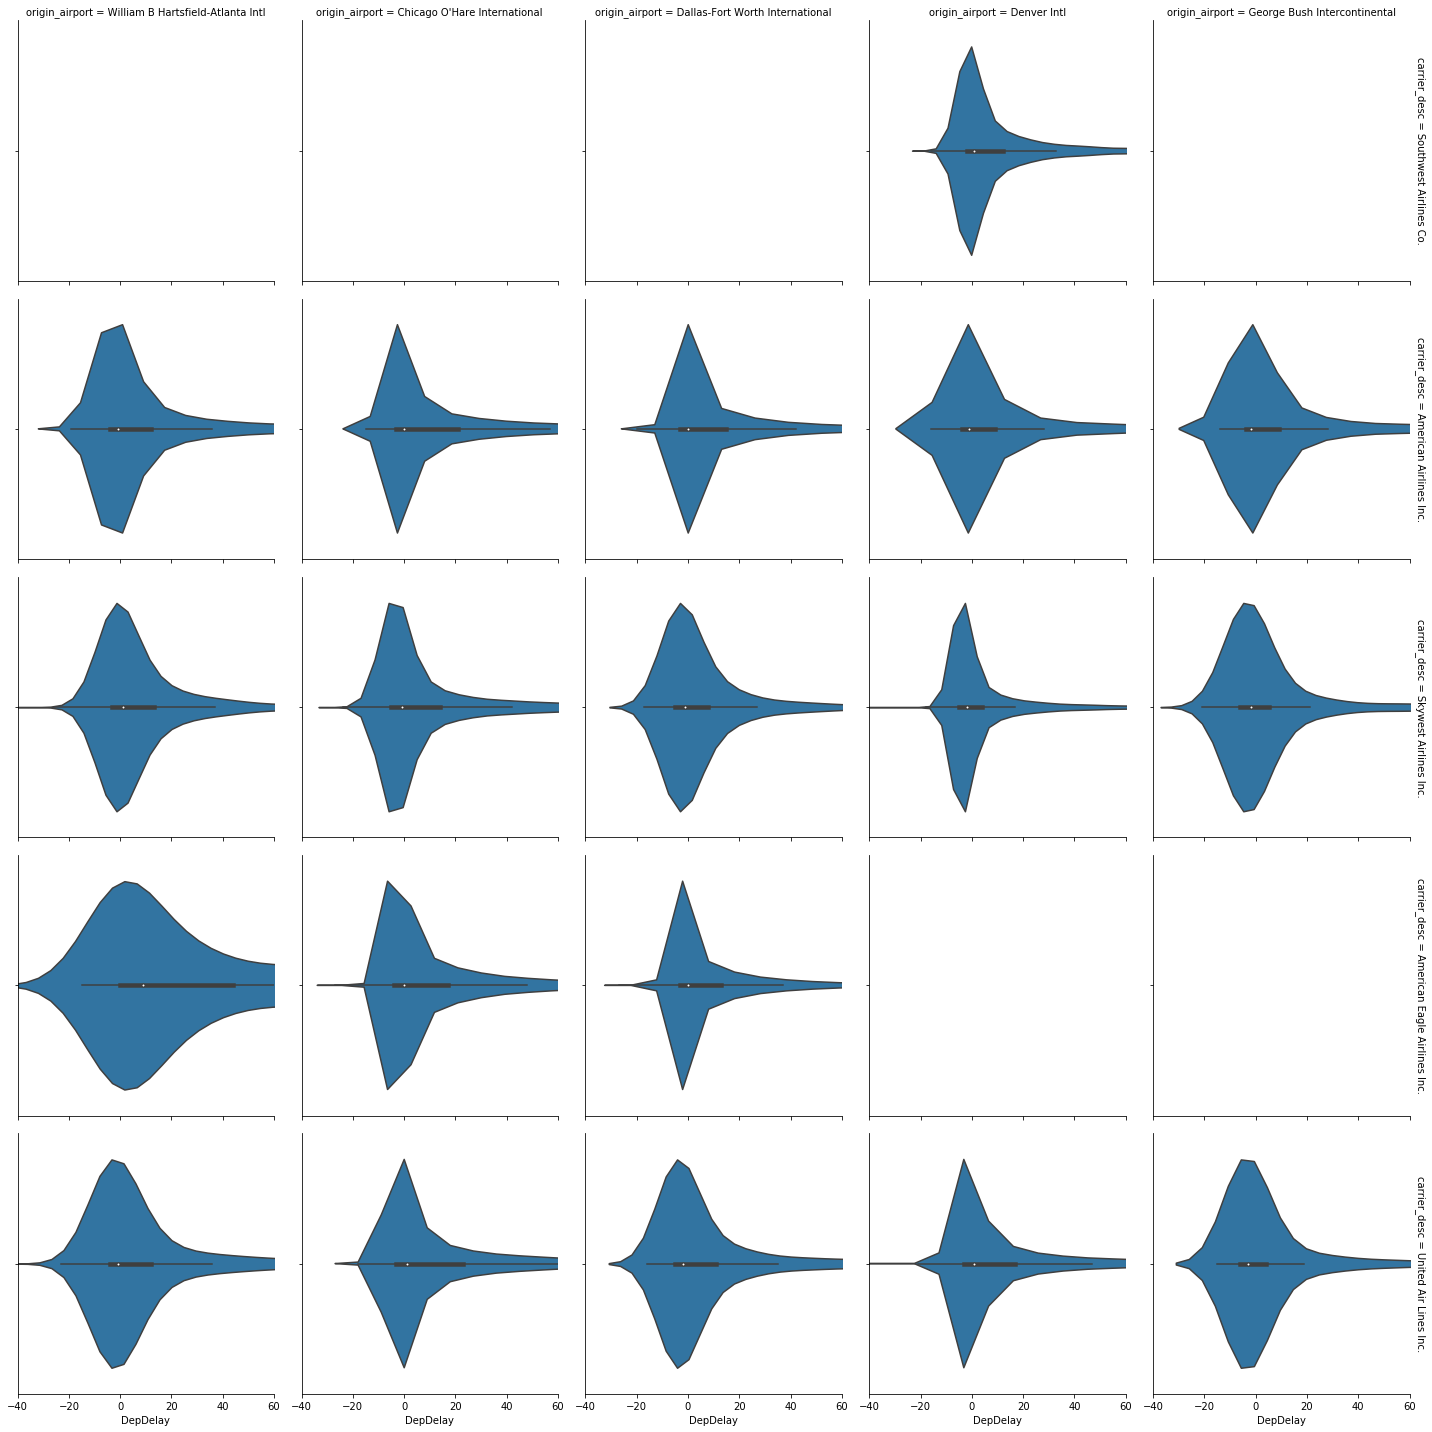

In [92]:
# We will use origin_airport as columns
# We will use carrier_desc as rows
# And in x axis will be the DepDelay with Violinplot

g = sb.FacetGrid(data = df_2008_clean, col = 'origin_airport', row = 'carrier_desc', height=4,
                 margin_titles = True, row_order=order_c, col_order=origin_order, xlim = [-40, 60]);
g.map(sb.violinplot,'DepDelay');
#g.map(plt.scatter,'DepDelay', 'ArrDelay', alpha = 1/10);

C:\Users\raied\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


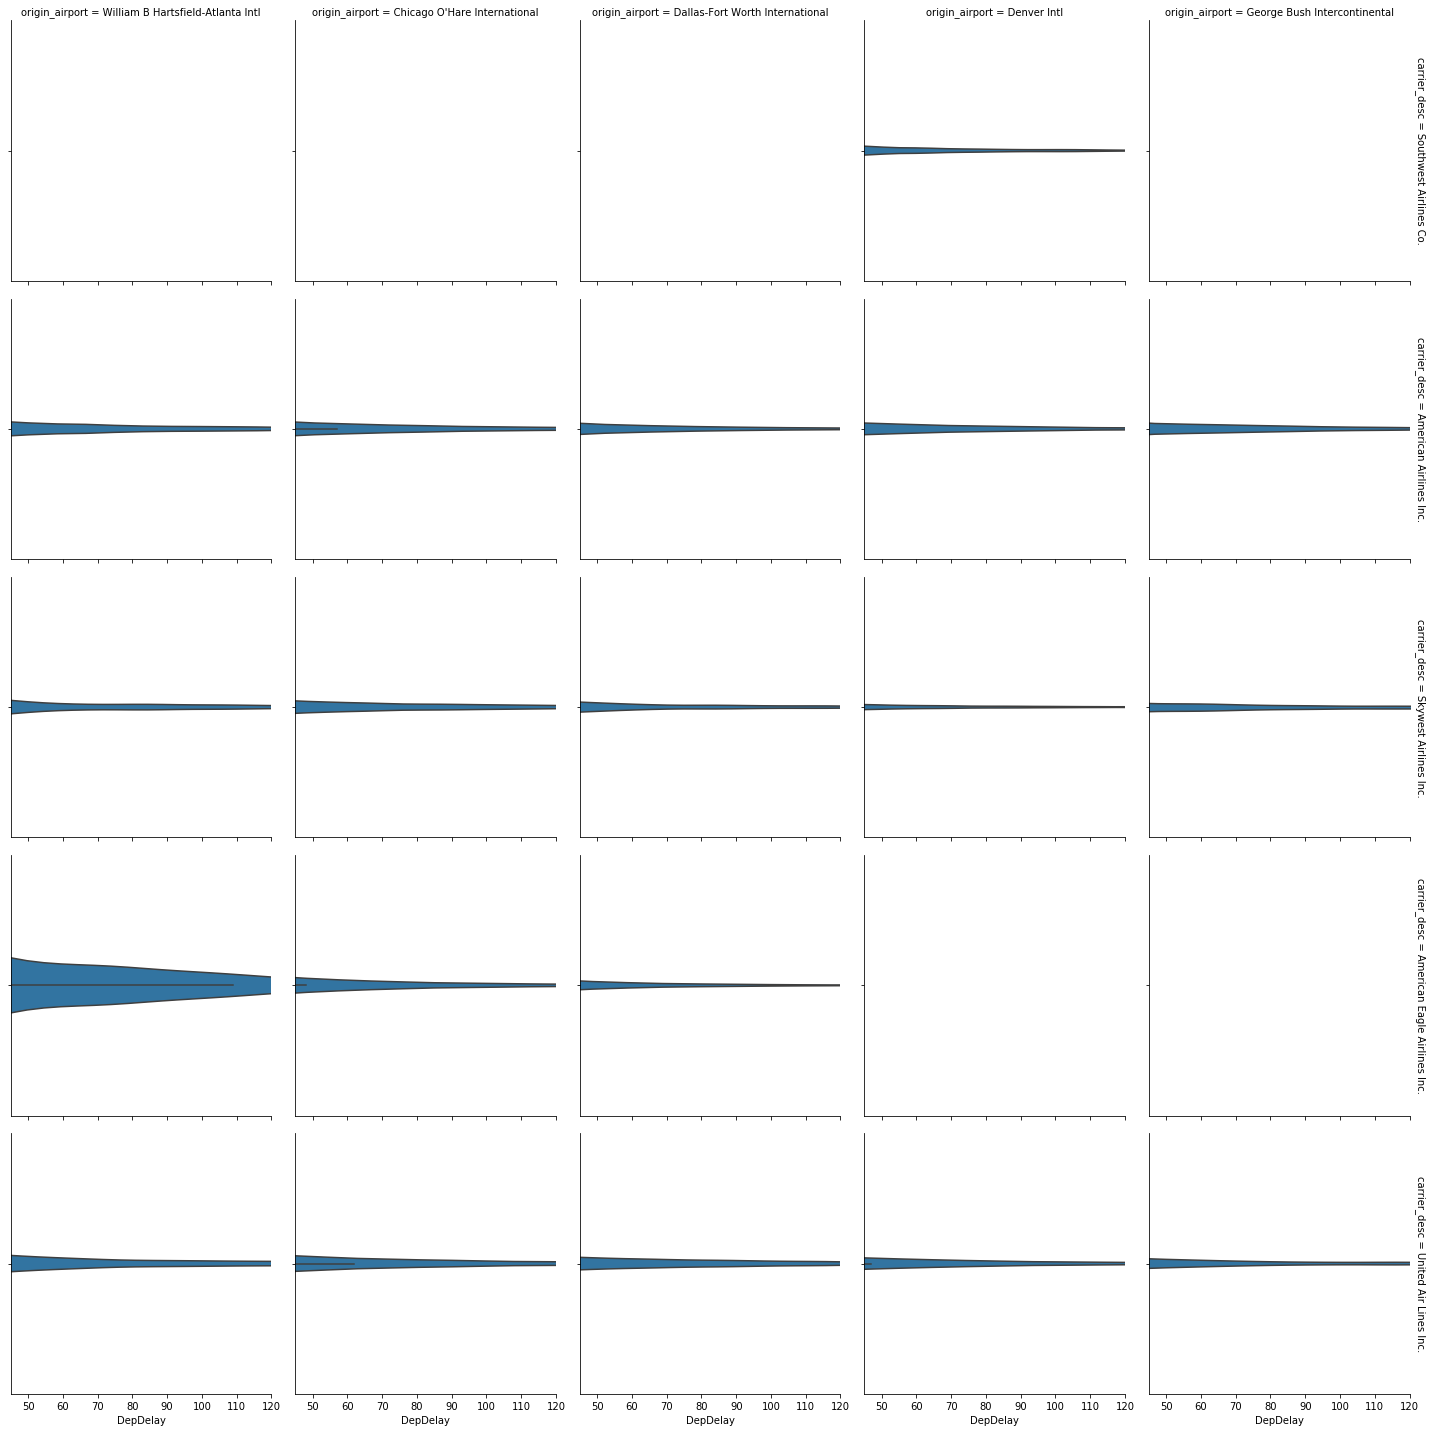

In [93]:
# Let's increase the xlim to be 45 min. to 120 min. to make a closer look

g = sb.FacetGrid(data = df_2008_clean, col = 'origin_airport', row = 'carrier_desc', height=4,
                 margin_titles = True, row_order=order_c, col_order=origin_order, xlim = [45, 120]);
g.map(sb.violinplot,'DepDelay');
#g.map(plt.scatter,'DepDelay', 'ArrDelay', alpha = 1/10);

Here we can see a sample of 5x5 relationships between `carrier`, `origin_airport`, and their `DepDelay`
<br></br>
We can see that **carrier: American Eagle Airlines Inc.** has more delay with **origin_airport: William B Hartsfield-Atlanta Intl** than others

In [82]:
# Just to be sure, because of the warning message above

test = df_2008_clean.query('carrier_desc == "American Eagle Airlines Inc." and origin_airport == "William B Hartsfield-Atlanta Intl"')
test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,DepTimeHH
3337133,2008,1,1,2,NaN,1315,NaN,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,-1
3337134,2008,1,2,3,1348.0,1315,1457.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337135,2008,1,3,4,1313.0,1315,1407.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337136,2008,1,4,5,1348.0,1315,1438.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337137,2008,1,5,6,1328.0,1315,1419.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337138,2008,1,6,7,1457.0,1315,1622.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,14
3337139,2008,1,7,1,1358.0,1315,1456.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337140,2008,1,8,2,1359.0,1315,1504.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337141,2008,1,9,3,1320.0,1315,1409.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13
3337142,2008,1,10,4,1320.0,1315,1405.0,1420,MQ,4443,...,33.640444,-84.426944,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,13


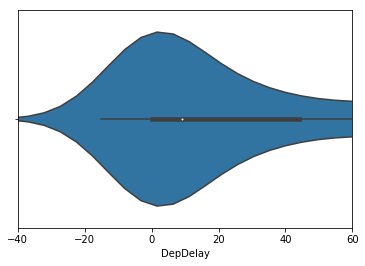

In [83]:
# Just to be sure, because of the warning message above

sb.violinplot(data = test, x = 'DepDelay');
plt.xlim([-40, 60]);

In [87]:
# We can move to the next 5 carriers and the next 5 origin_airport by increasing the iloc inputs

origin_order = delay.origin_airport.value_counts().iloc[5:10].index
order_c = delay['carrier_desc'].value_counts().iloc[5:10].index